In [1]:
import pandas as pd
import numpy as np
import anndata as ad
from random import sample
from math import ceil
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from SpatialDE import spatial_patterns, SpatialPatternParameters

In [2]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt"
df = pd.read_csv(filename, sep = "\t", index_col=0)
df.head()

ENSG00000005059_CCDC109B_-4_110648632_T_A  \
21843_1#10                                   -0.023362   
21843_1#100                                  -0.047974   
21843_1#101                                  -0.017072   
21843_1#102                                  -0.068498   
21843_1#103                                  -0.020660   

             ENSG00000006016_CRLF1_-19_18735221_G_T  \
21843_1#10                                 0.037167   
21843_1#100                               -0.002568   
21843_1#101                               -0.038324   
21843_1#102                                0.029141   
21843_1#103                                0.017882   

             ENSG00000006459_KDM7A_-7_139913409_G_A  \
21843_1#10                                -0.029628   
21843_1#100                               -0.050304   
21843_1#101                                0.001072   
21843_1#102                                0.006591   
21843_1#103                               -0.019781   

             ENSG00000013297_CLDN11_-3_170402765_T_C  \
21843_1#10                                  0.182970   
21843_1#100                                 0.142045   
21843_1#101                                 0.050680   
21843_1#102                                 0.277722   
21843_1#103                                 0.127132   

             ENSG00000021300_PLEKHB1_-11_73339784_G_A  \
21843_1#10                                  -0.037939   
21843_1#100                                 -0.064256   
21843_1#101                                 -0.042117   
21843_1#102                                  0.052109   
21843_1#103                                 -0.044320   

             ENSG00000029639_TFB1M_-6_155635808_C_G  \
21843_1#10                                -0.029324   
21843_1#100                               -0.017894   
21843_1#101                               -0.028164   
21843_1#102                               -0.039448   
21843_1#103                               -0.010911   

             ENSG00000033178_UBA6_-4_68480525_C_T  \
21843_1#10                               0.031399   
21843_1#100                             -0.064684   
21843_1#101                             -0.079442   
21843_1#102                              0.002744   
21843_1#103                             -0.024408   

             ENSG00000035115_SH3YL1_-2_256116_G_T  \
21843_1#10                              -0.039623   
21843_1#100                             -0.088204   
21843_1#101                             -0.058548   
21843_1#102                             -0.087830   
21843_1#103                             -0.039310   

             ENSG00000059377_TBXAS1_-7_139547370_G_A  \
21843_1#10                                  0.080138   
21843_1#100                                 0.232739   
21843_1#101                                 0.142455   
21843_1#102                                 0.060839   
21843_1#103                                 0.068838   

             ENSG00000063761_ADCK1_-14_78311319_G_A  ...  \
21843_1#10                                 0.027498  ...   
21843_1#100                                0.040376  ...   
21843_1#101                                0.019225  ...   
21843_1#102                                0.034591  ...   
21843_1#103                                0.009219  ...   

             ENSG00000248098_BCKDHA_-19_41937095_G_A  \
21843_1#10                                 -0.081858   
21843_1#100                                -0.161335   
21843_1#101                                -0.084641   
21843_1#102                                -0.054652   
21843_1#103                                -0.045432   

             ENSG00000248124_RRN3P1_-16_21818292_A_C  \
21843_1#10                                 -0.108624   
21843_1#100                                -0.455718   
21843_1#101                                -0.229172   
21843_1#102                                -0.093823   
21843_1#103                           

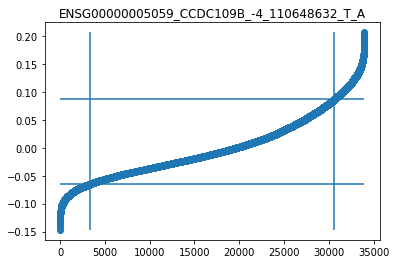

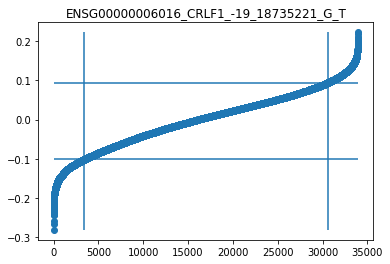

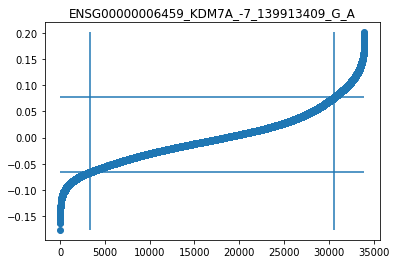

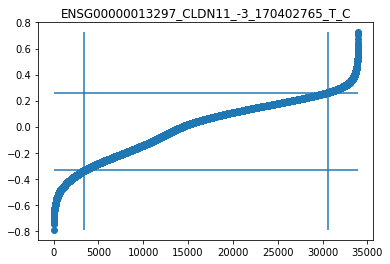

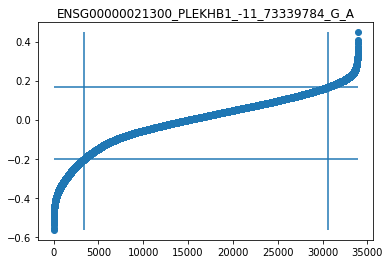

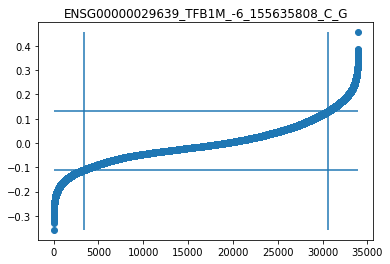

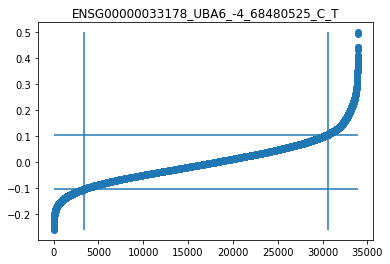

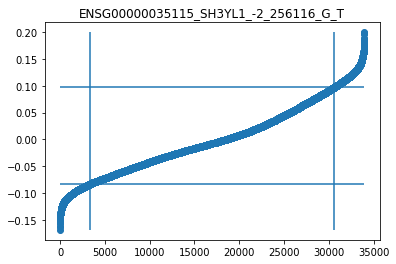

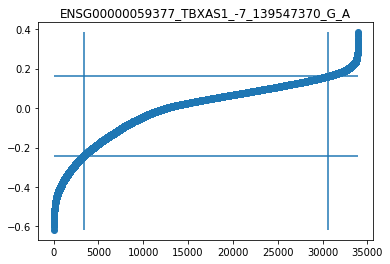

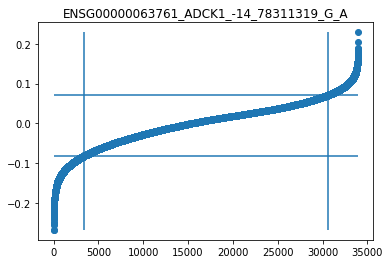

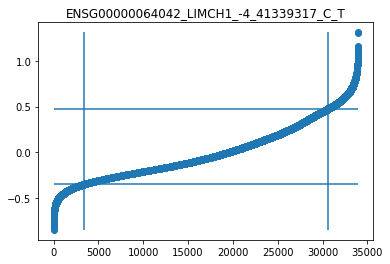

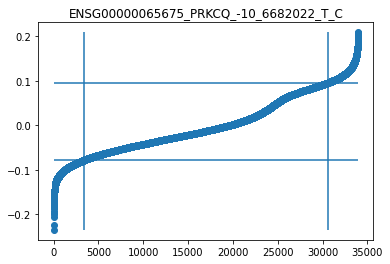

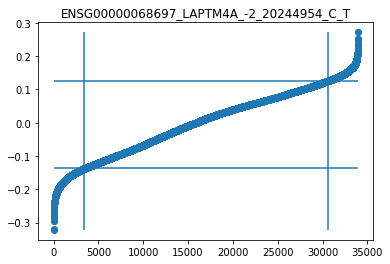

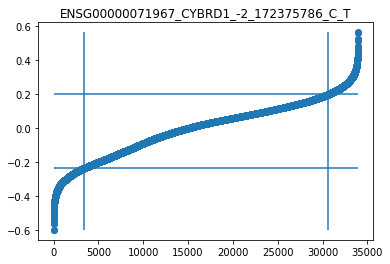

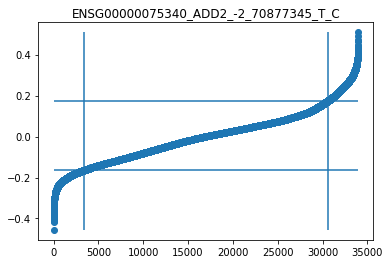

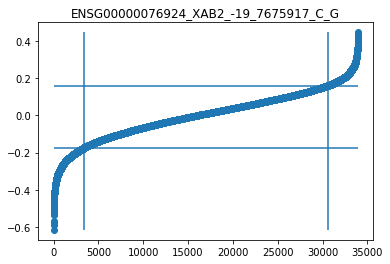

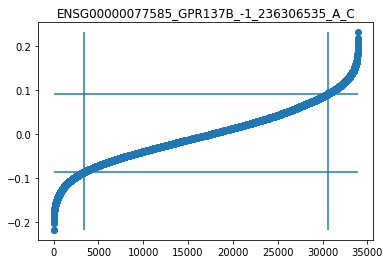

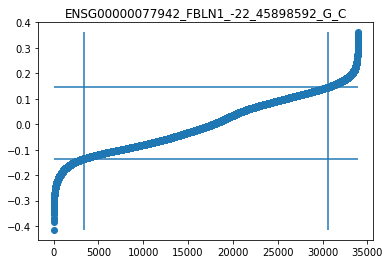

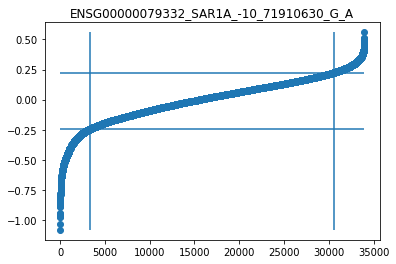

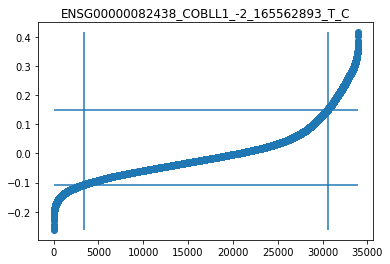

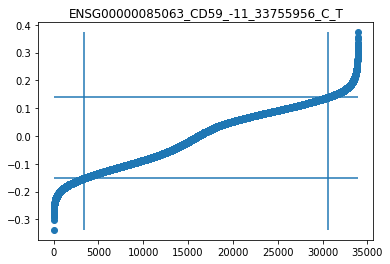

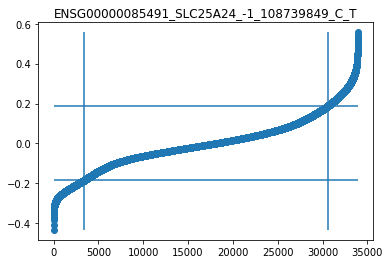

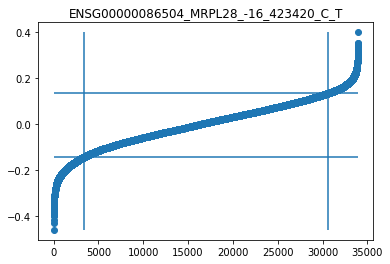

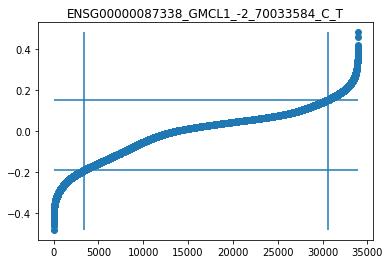

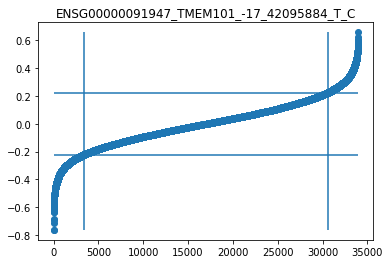

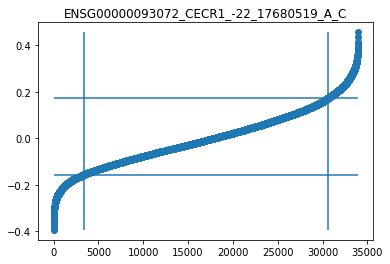

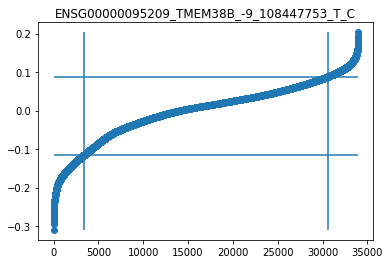

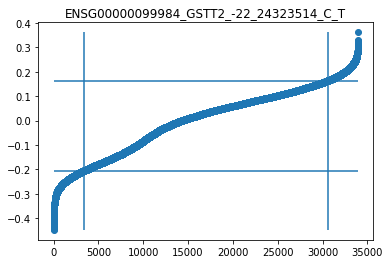

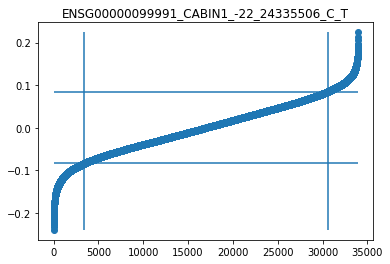

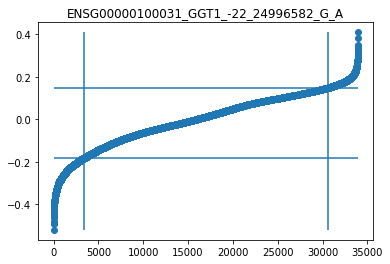

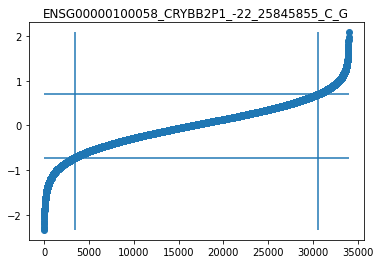

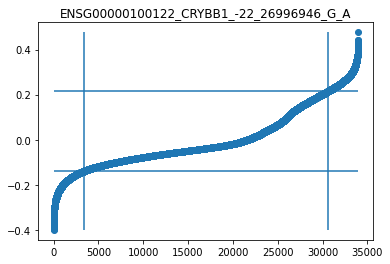

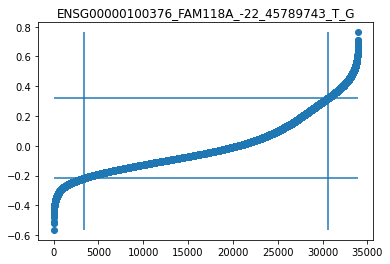

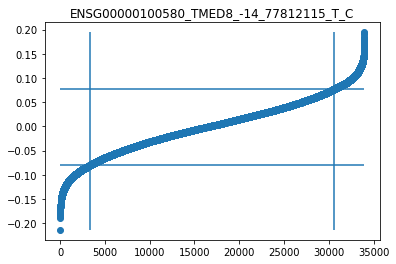

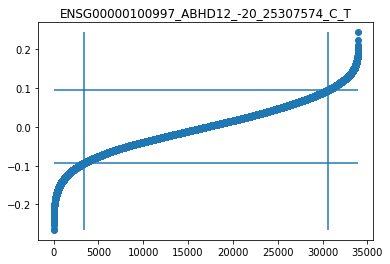

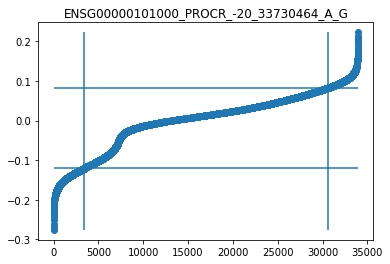

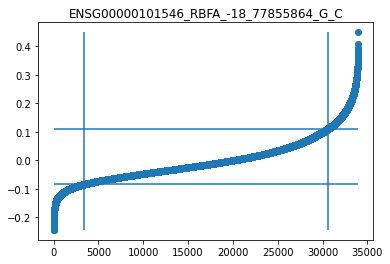

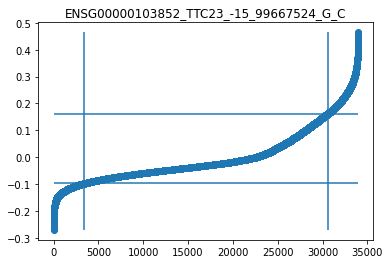

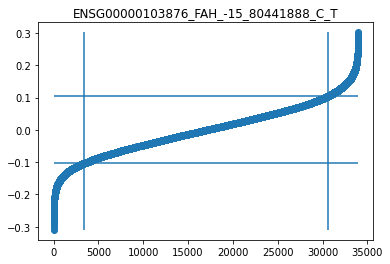

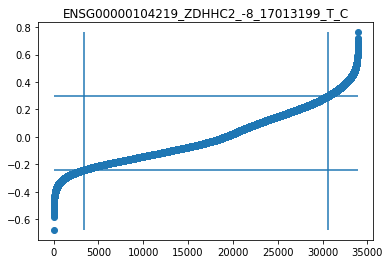

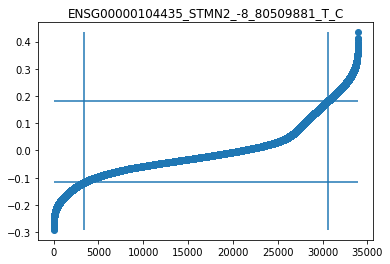

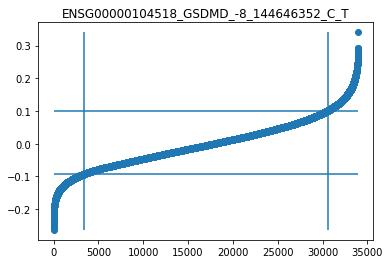

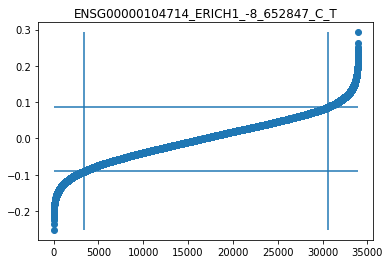

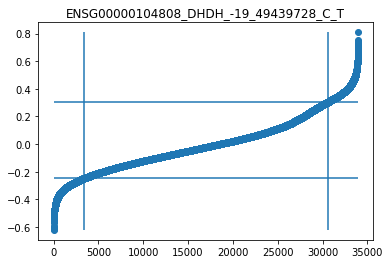

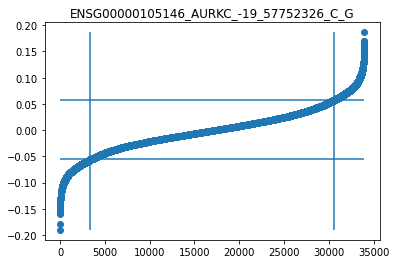

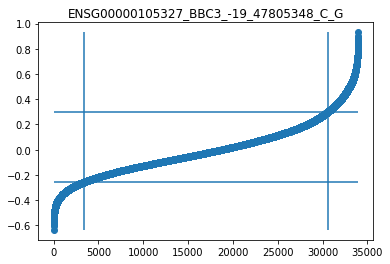

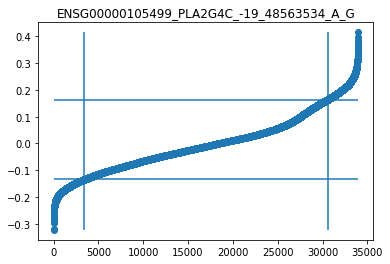

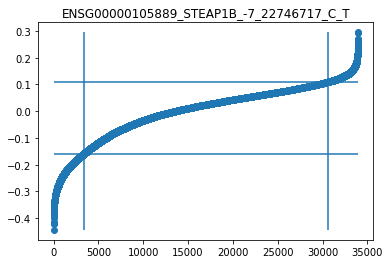

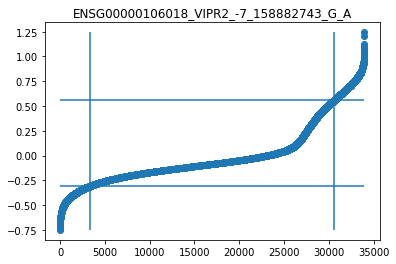

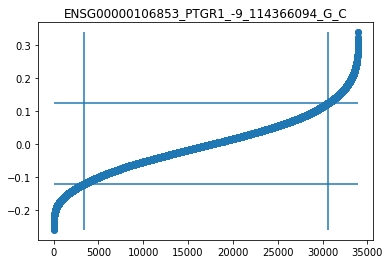

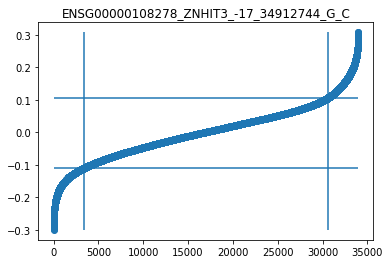

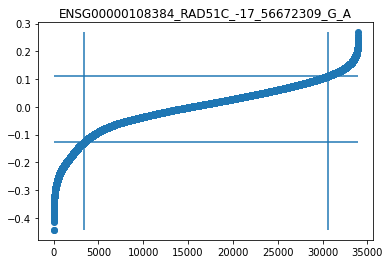

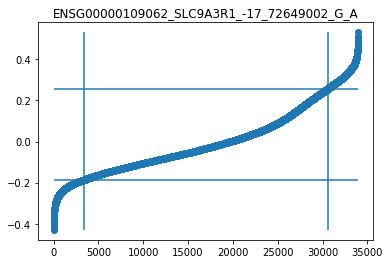

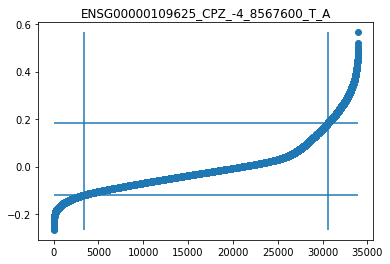

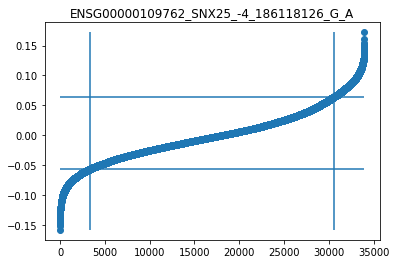

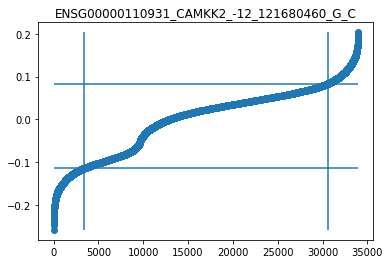

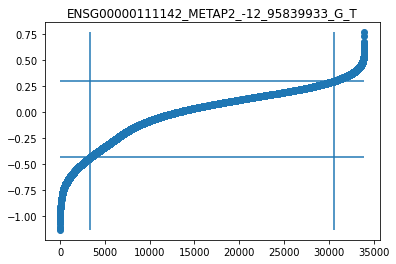

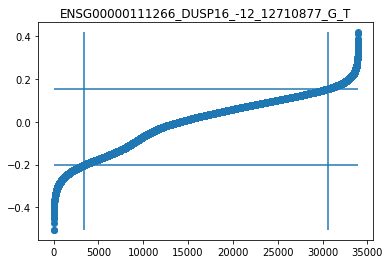

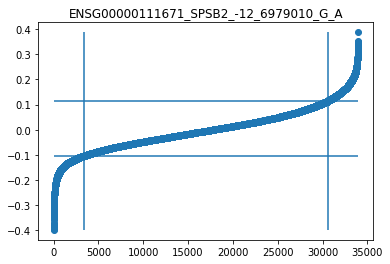

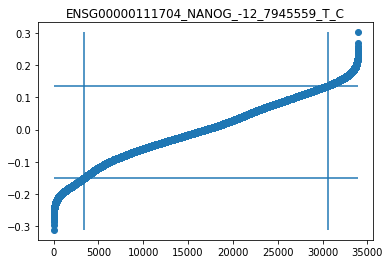

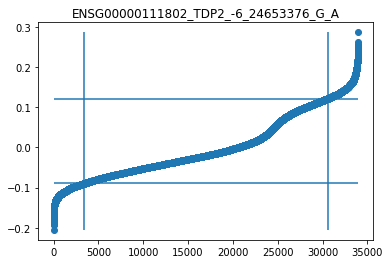

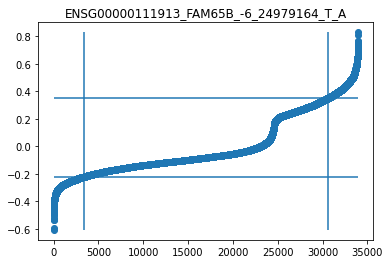

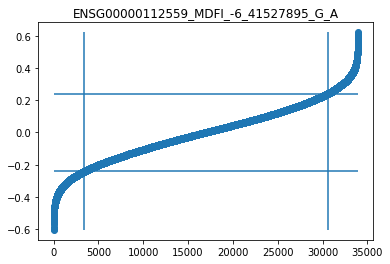

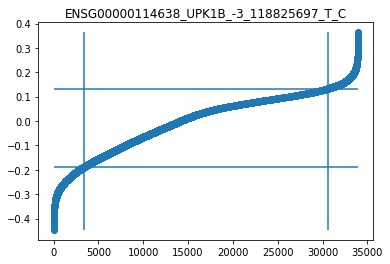

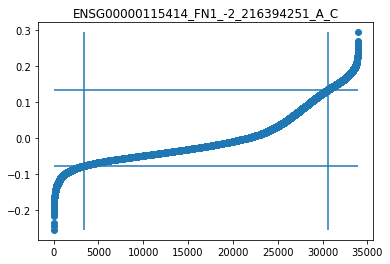

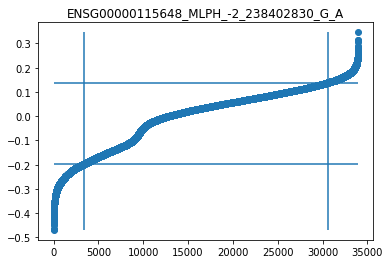

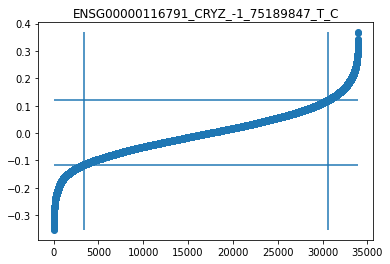

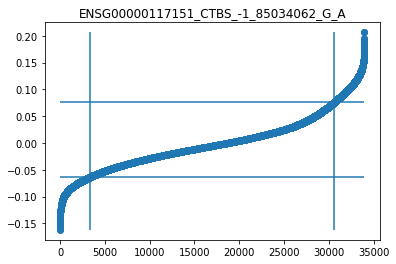

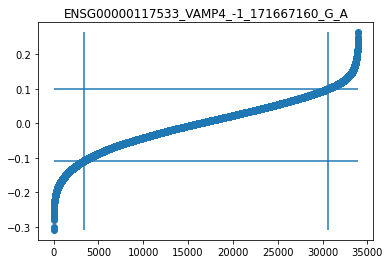

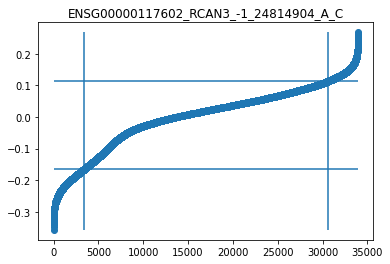

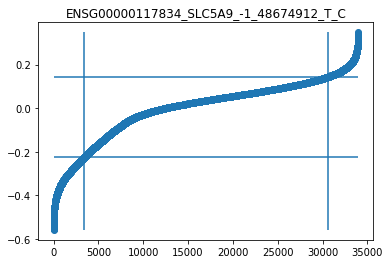

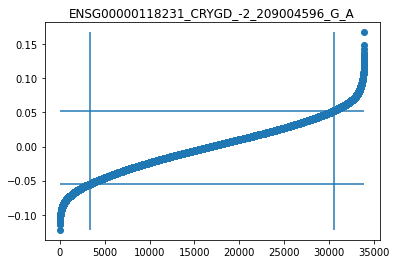

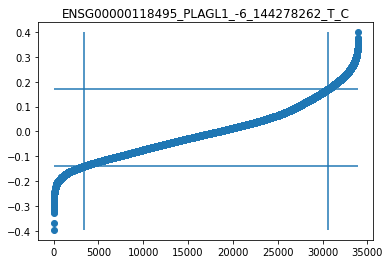

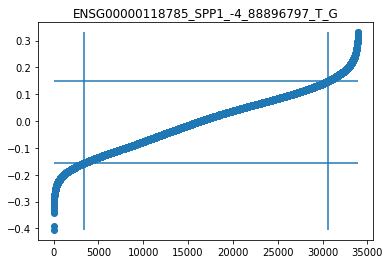

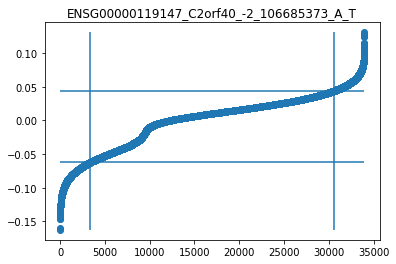

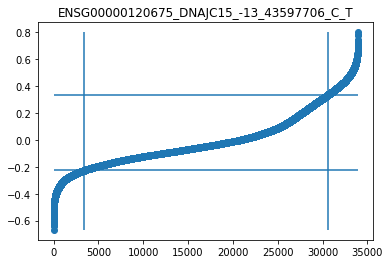

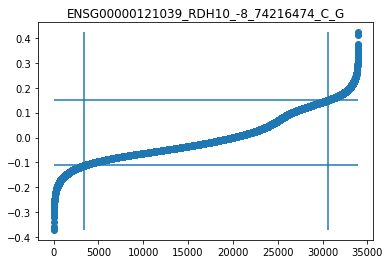

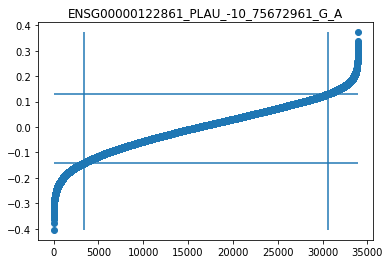

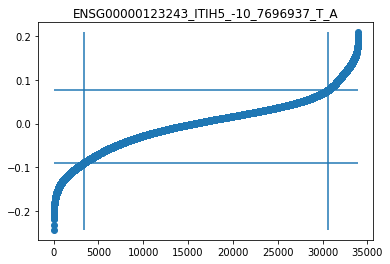

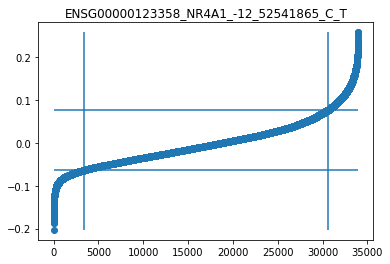

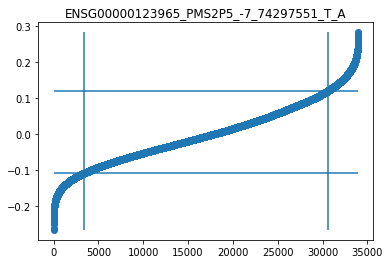

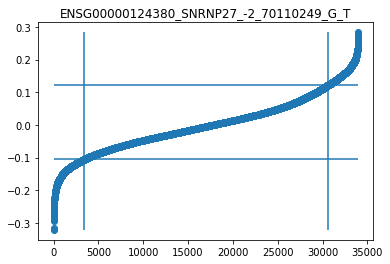

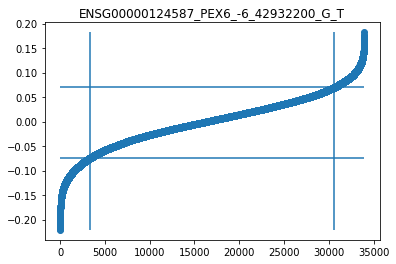

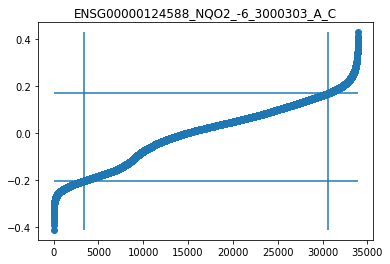

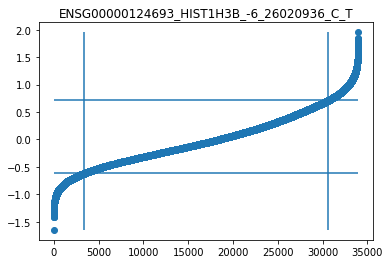

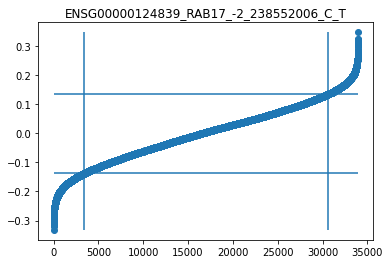

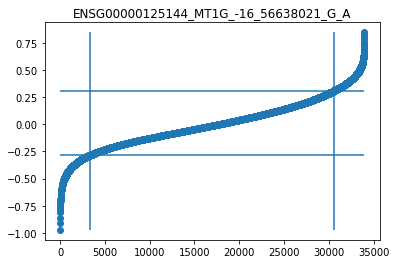

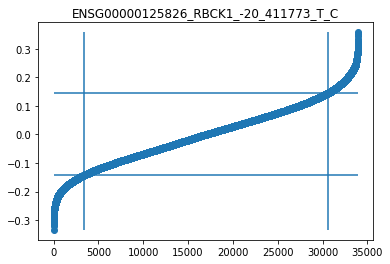

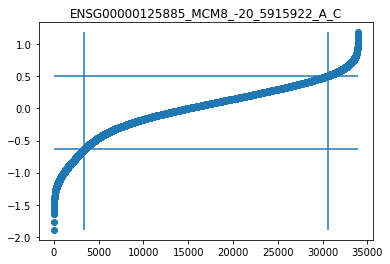

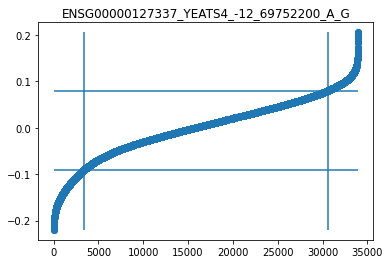

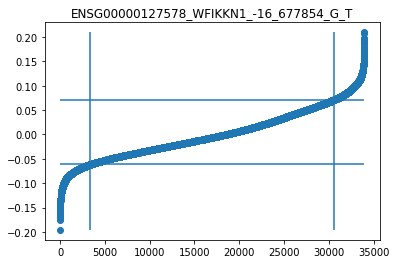

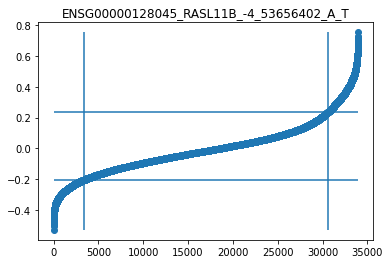

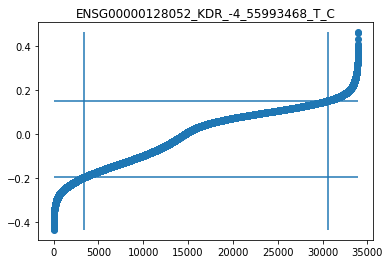

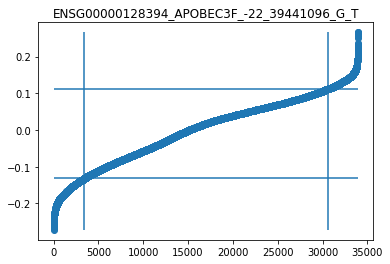

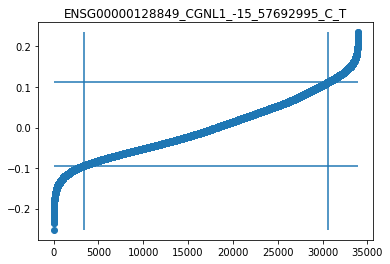

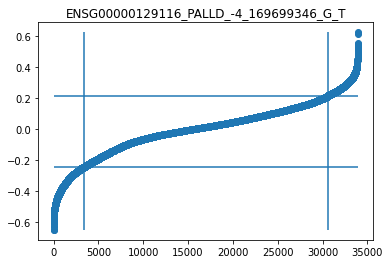

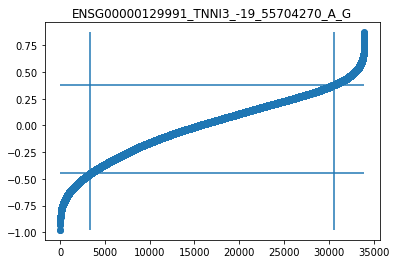

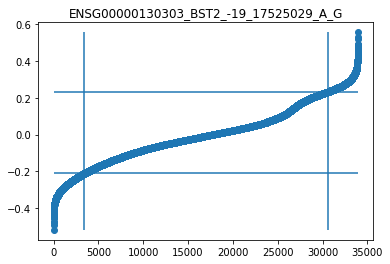

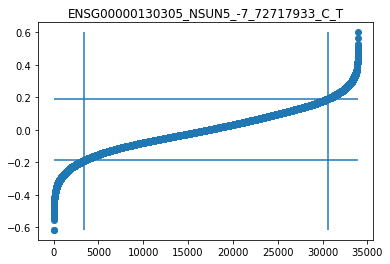

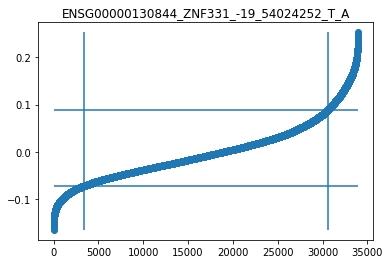

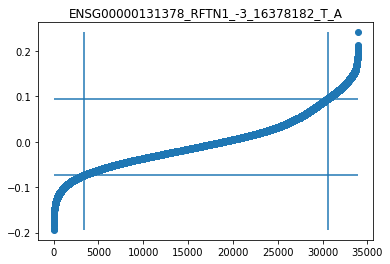

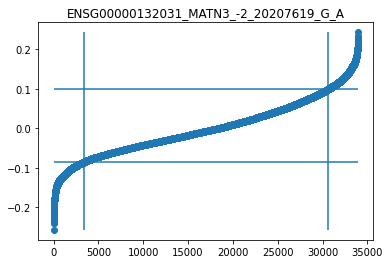

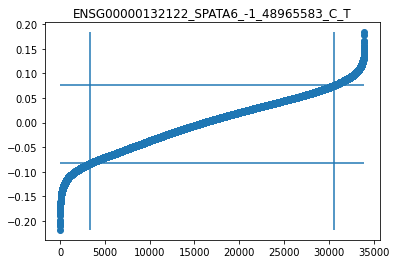

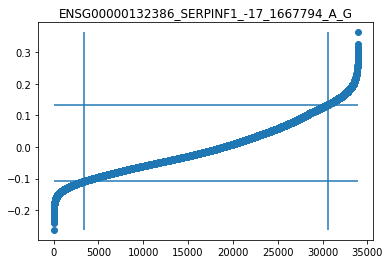

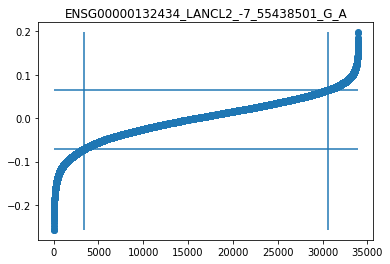

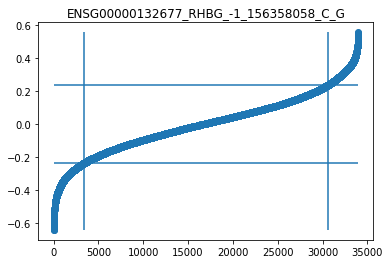

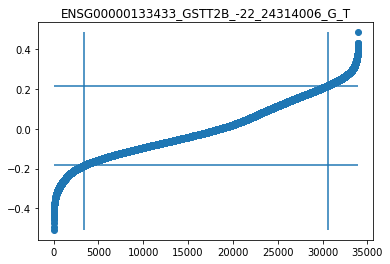

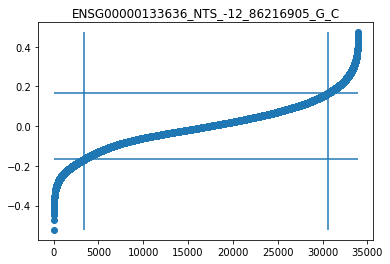

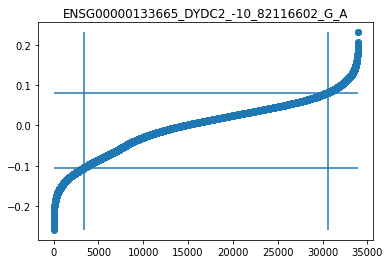

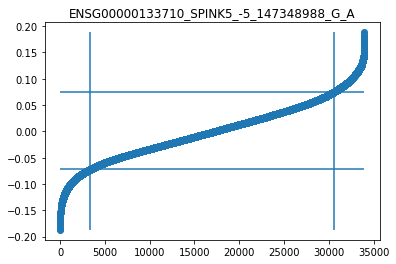

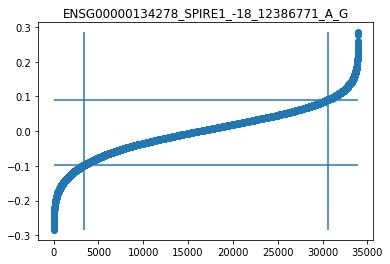

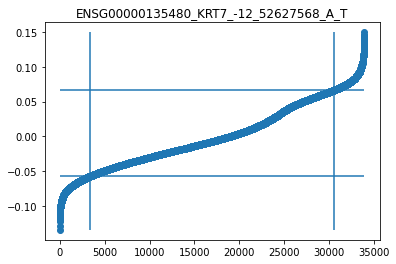

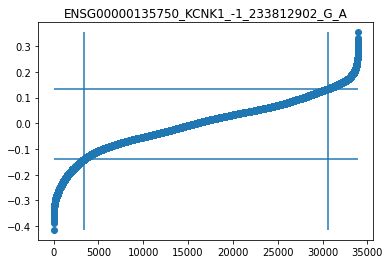

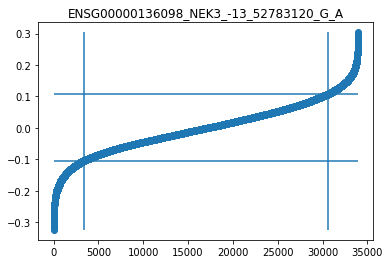

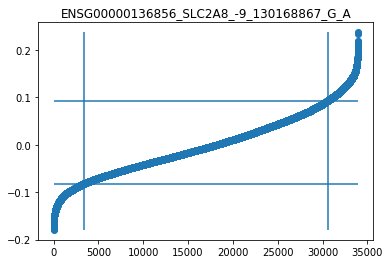

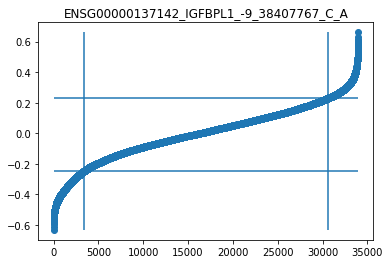

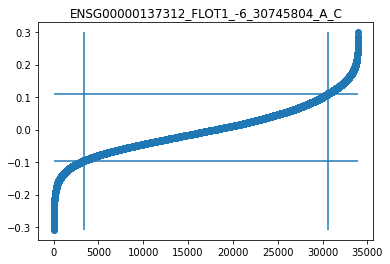

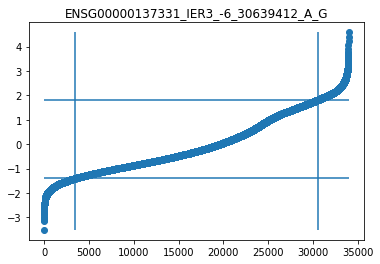

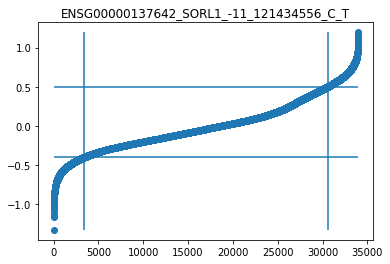

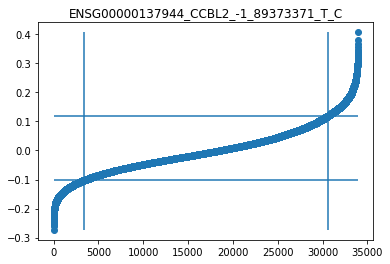

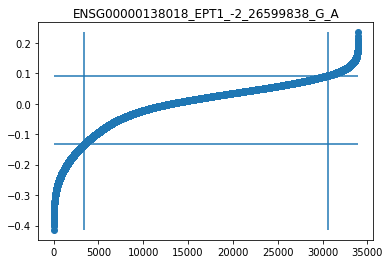

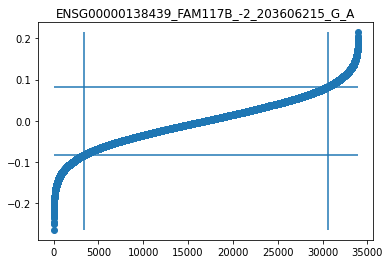

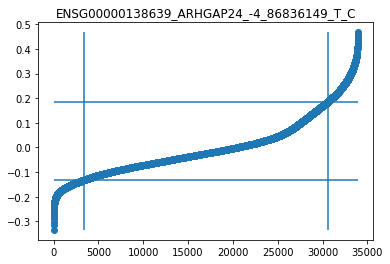

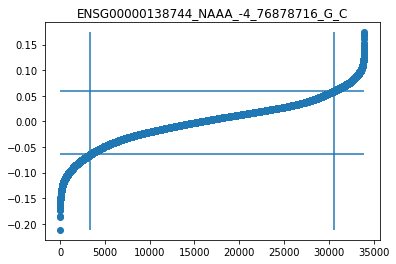

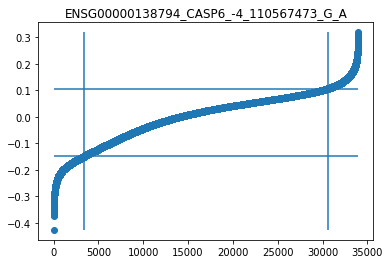

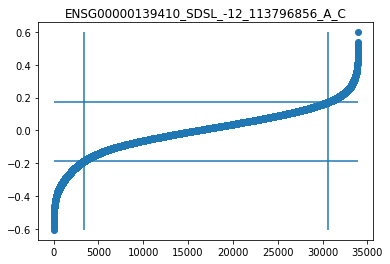

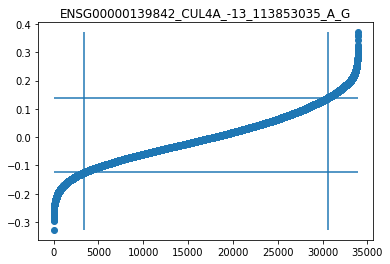

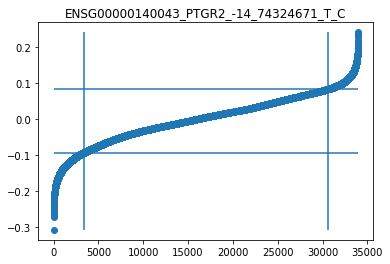

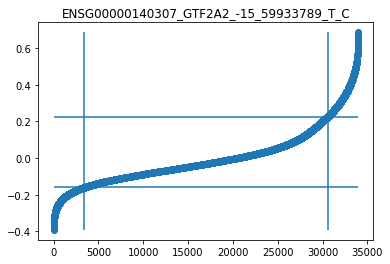

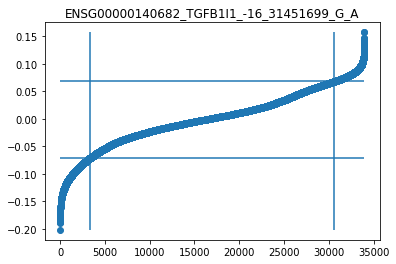

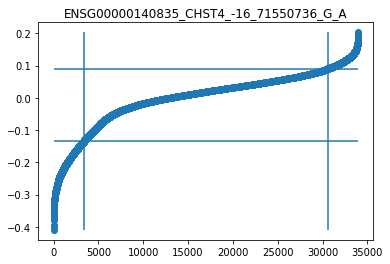

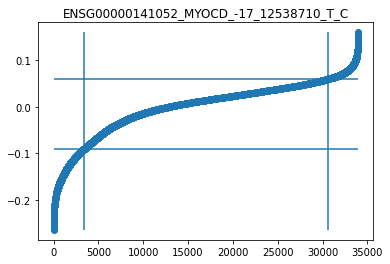

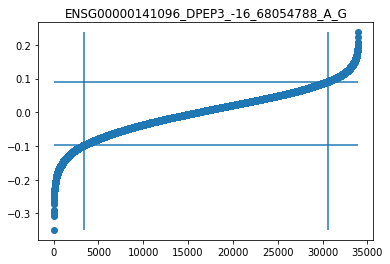

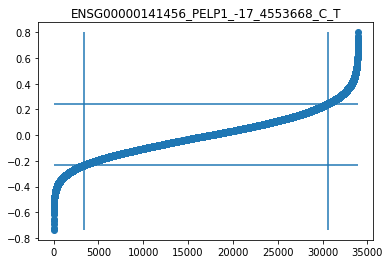

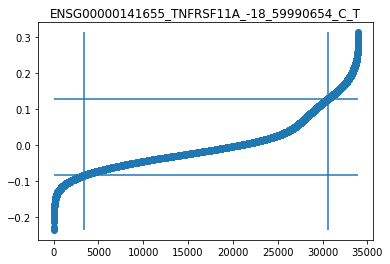

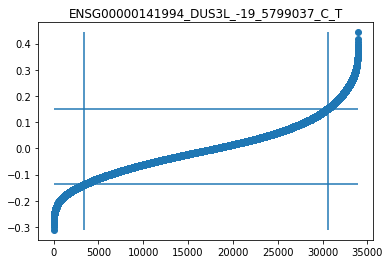

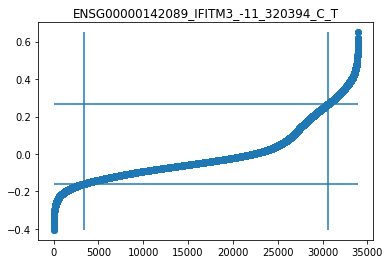

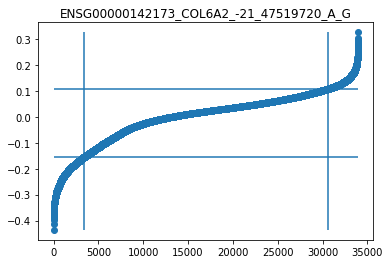

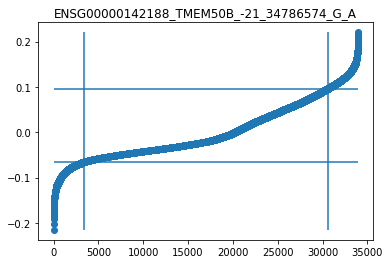

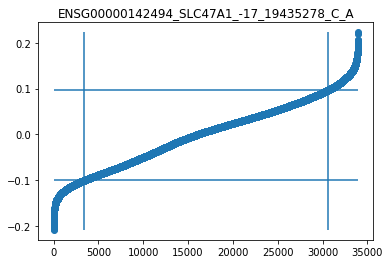

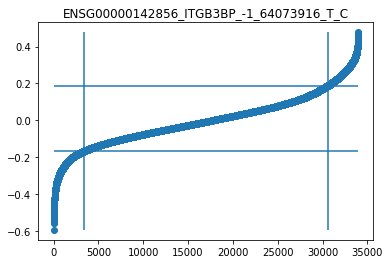

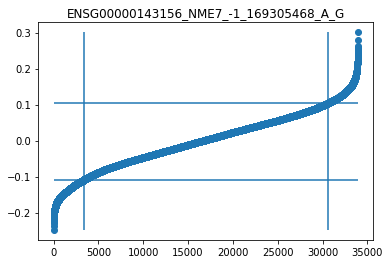

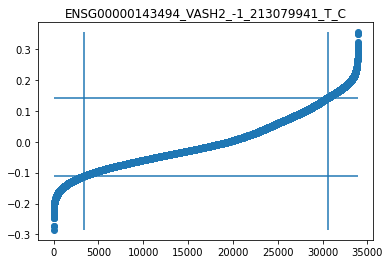

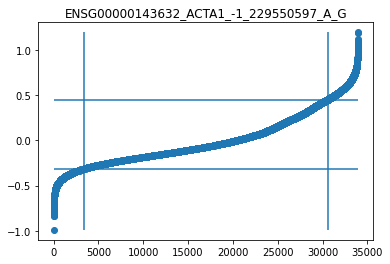

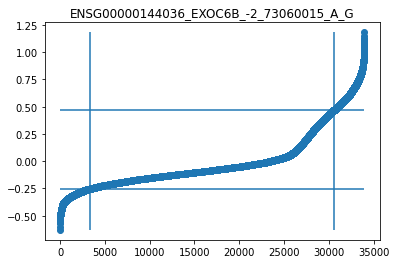

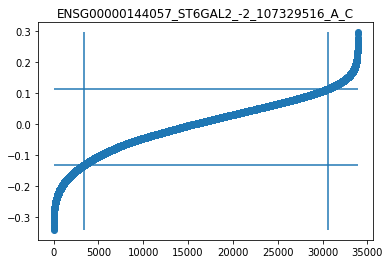

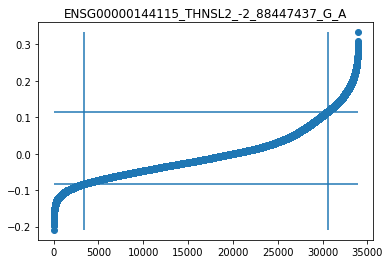

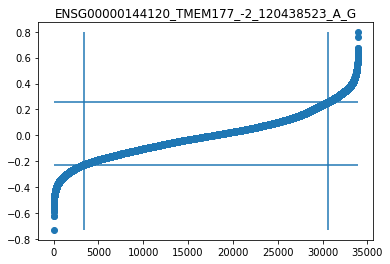

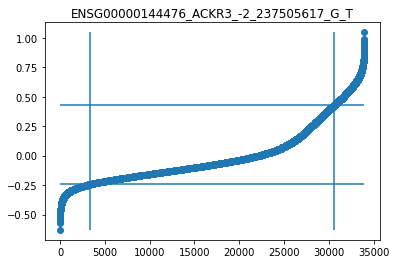

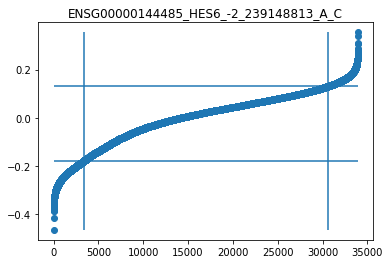

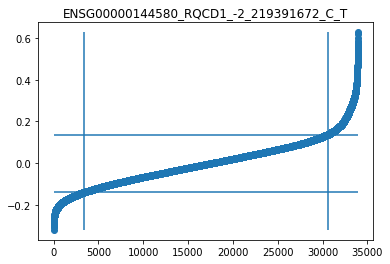

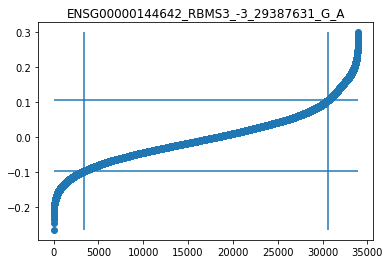

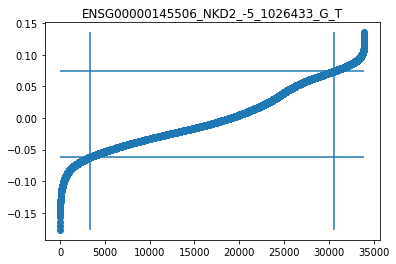

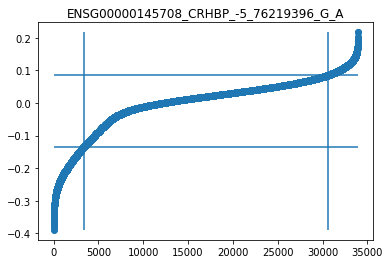

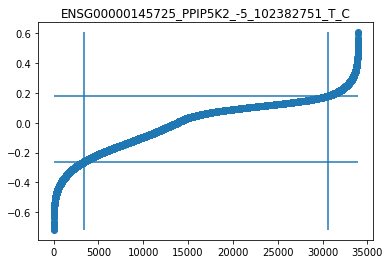

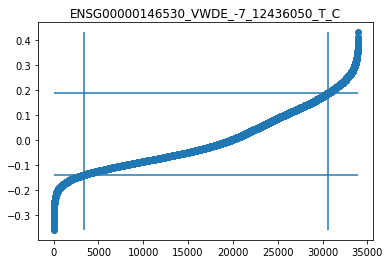

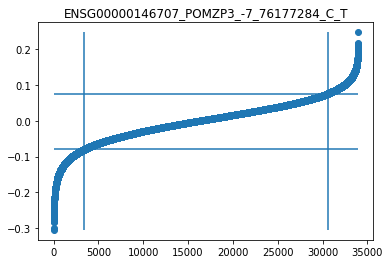

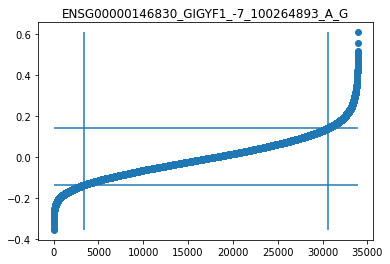

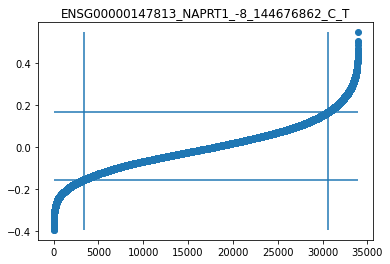

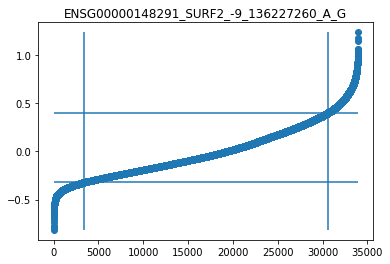

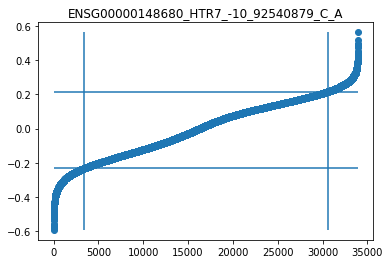

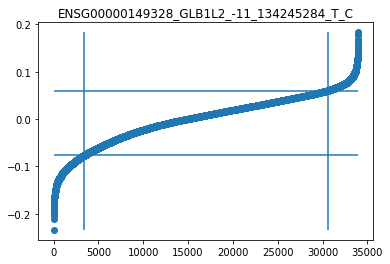

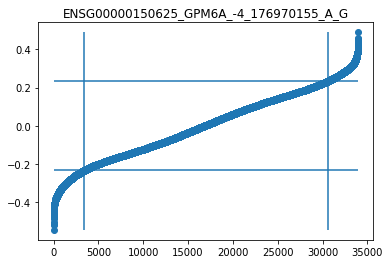

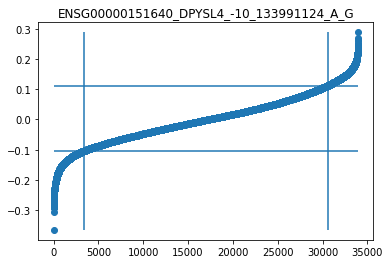

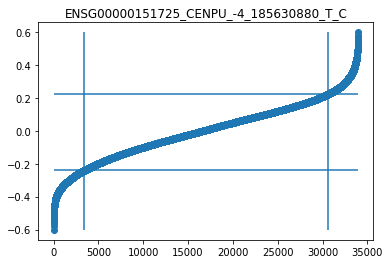

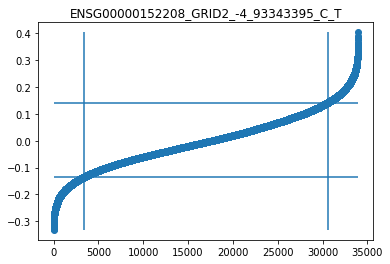

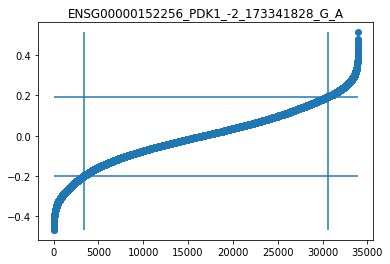

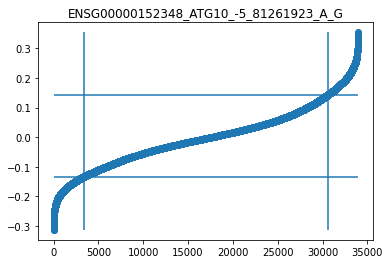

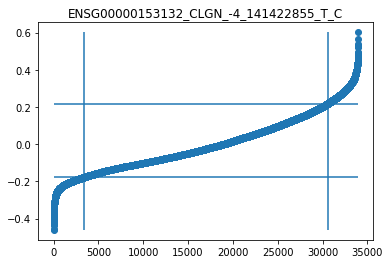

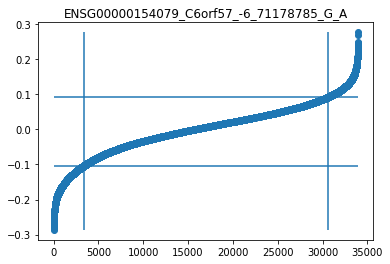

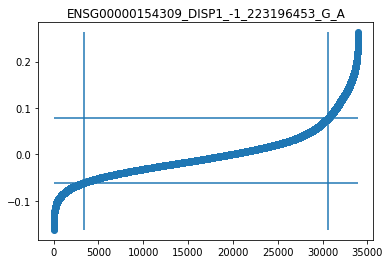

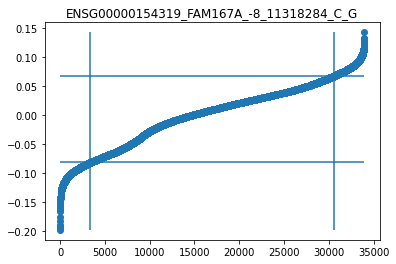

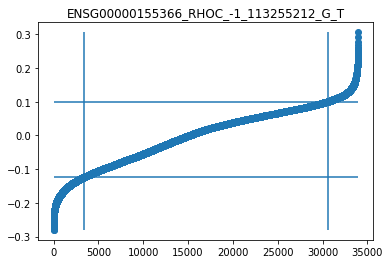

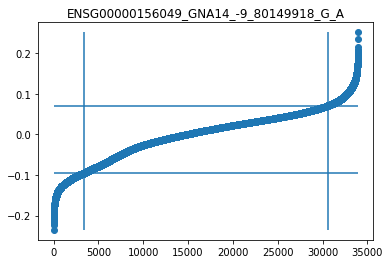

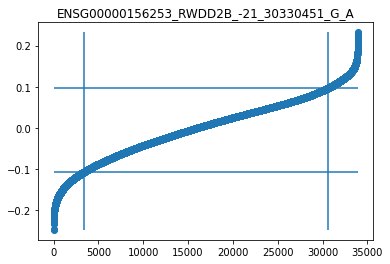

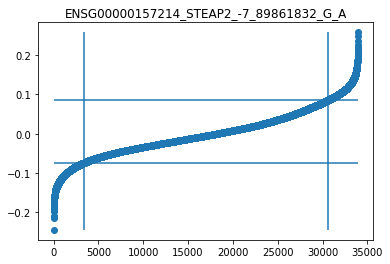

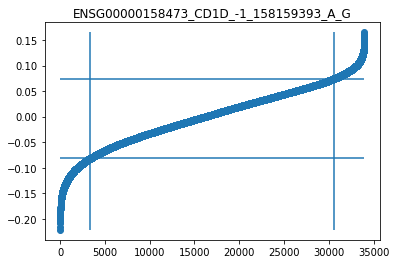

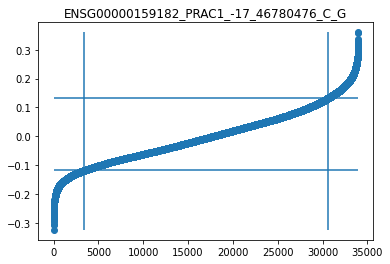

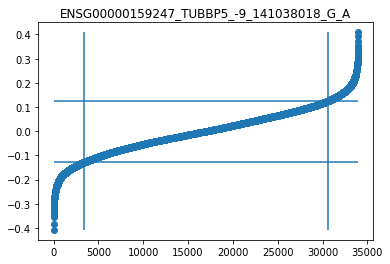

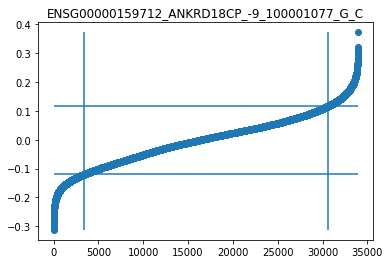

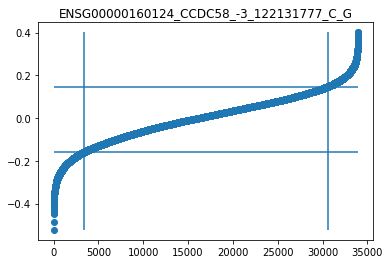

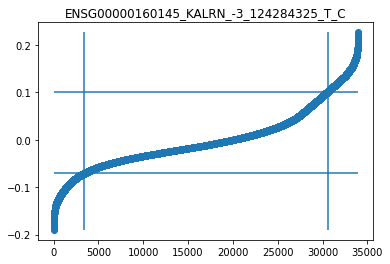

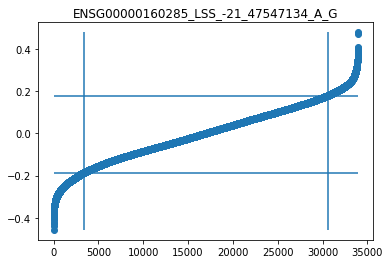

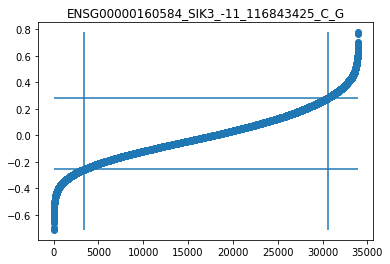

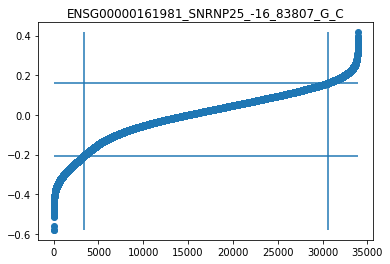

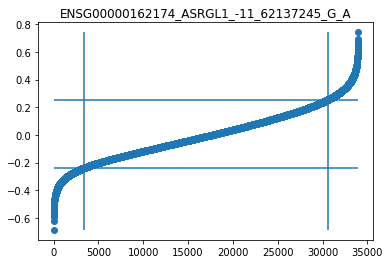

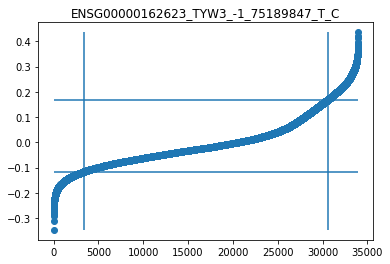

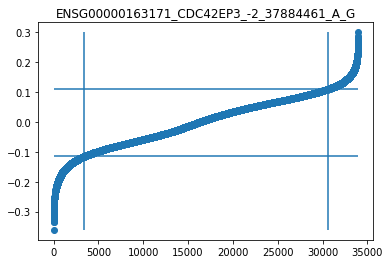

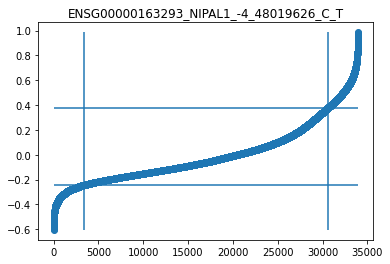

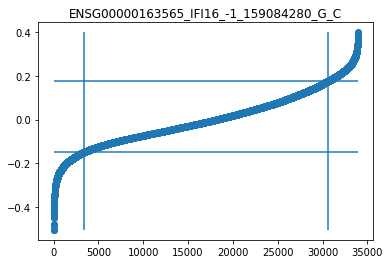

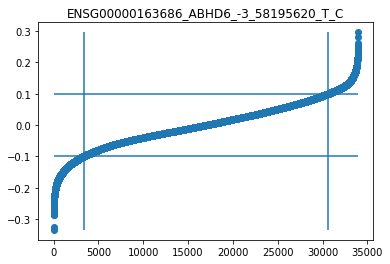

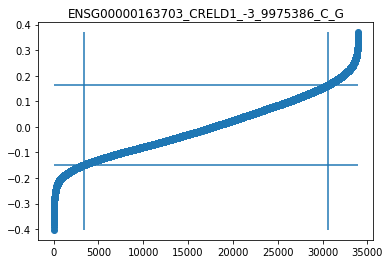

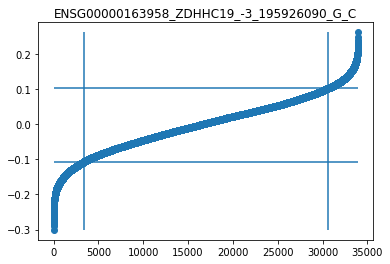

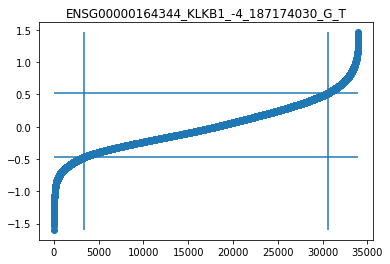

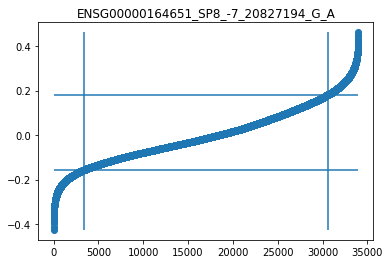

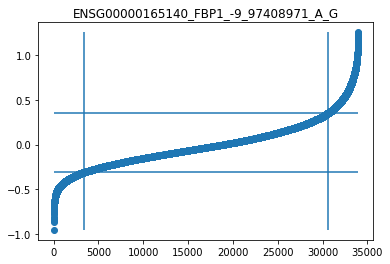

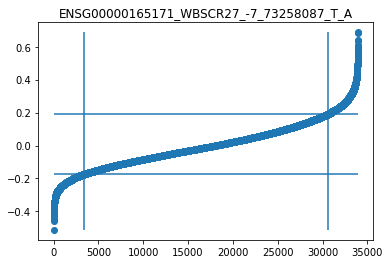

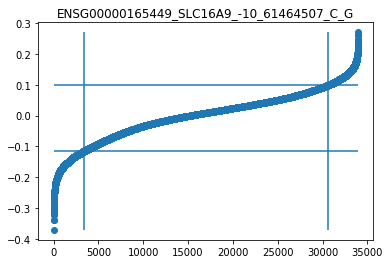

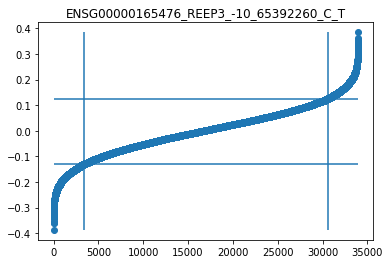

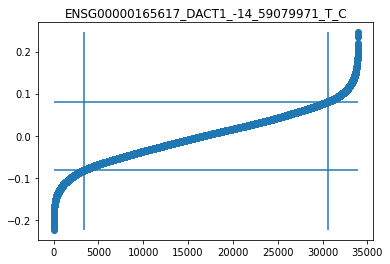

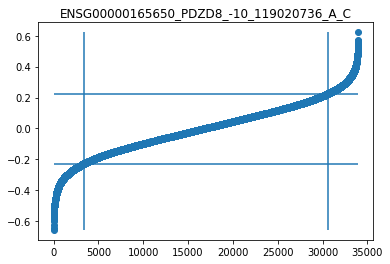

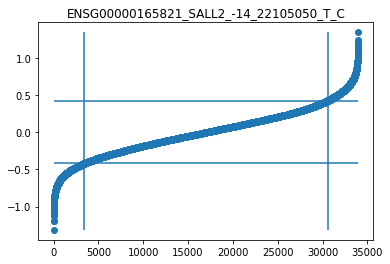

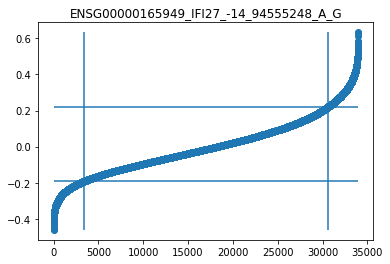

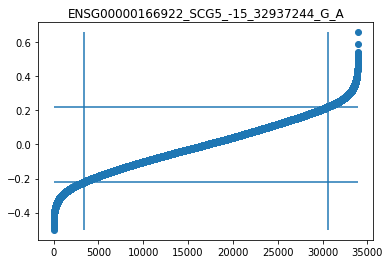

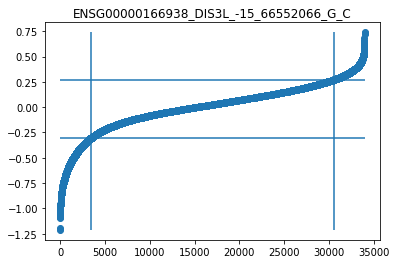

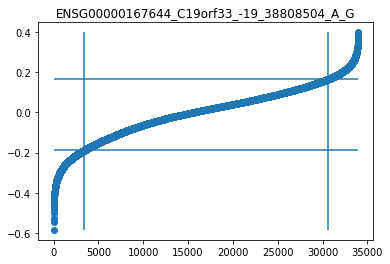

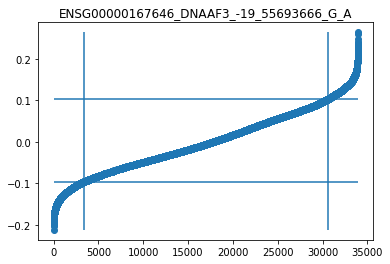

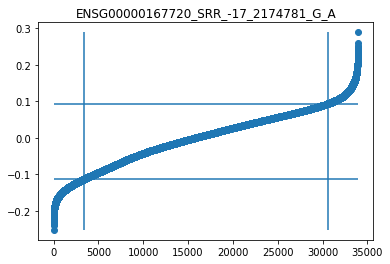

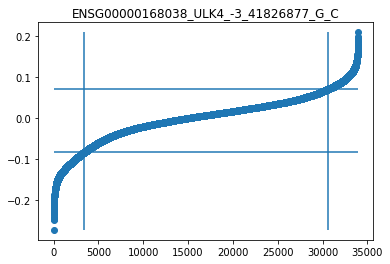

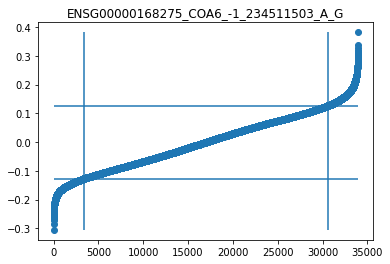

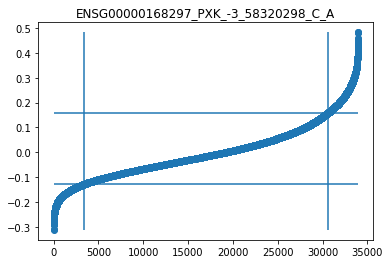

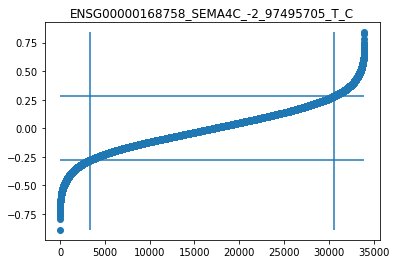

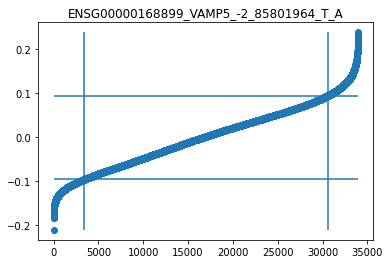

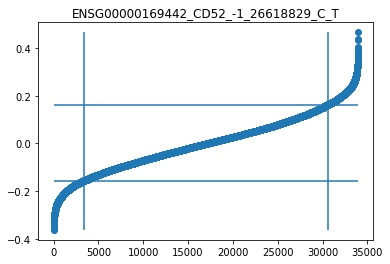

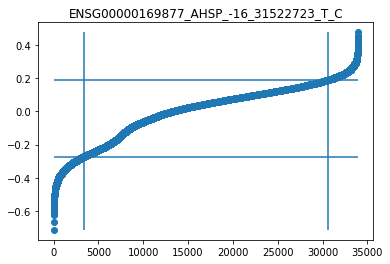

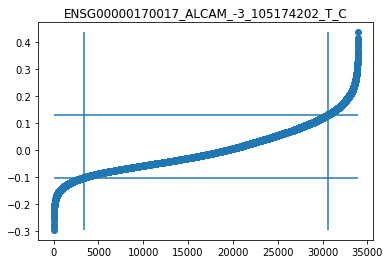

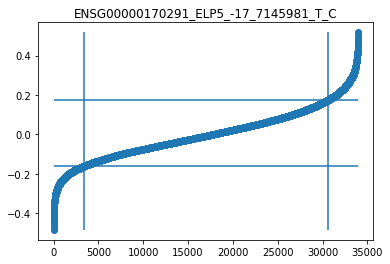

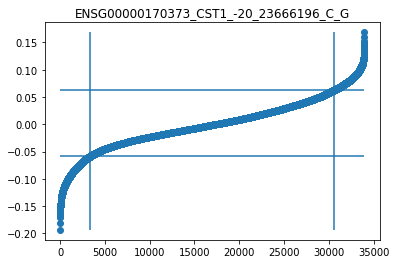

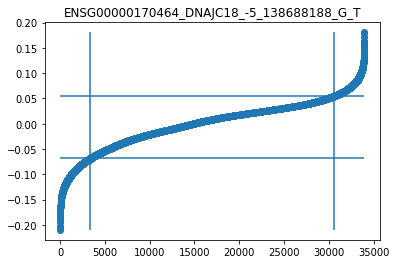

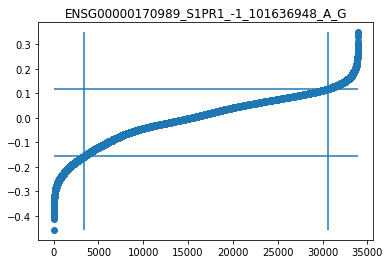

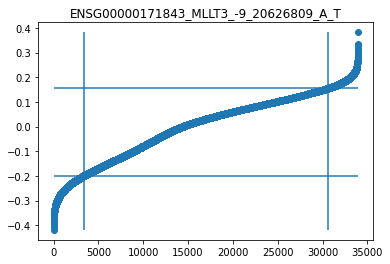

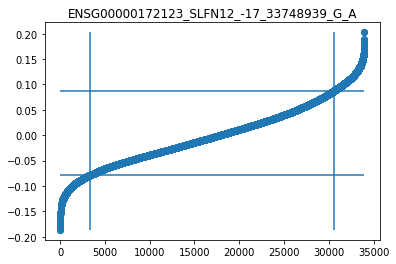

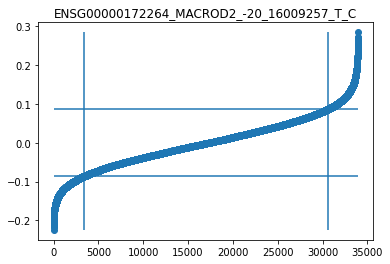

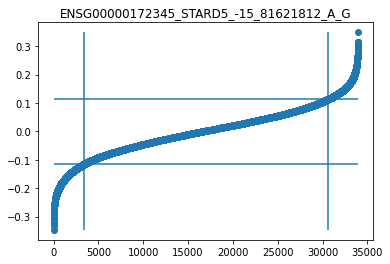

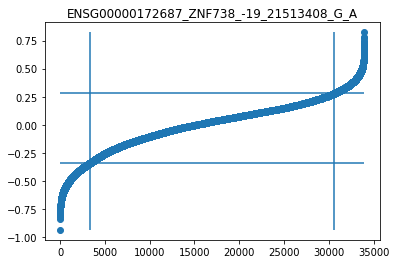

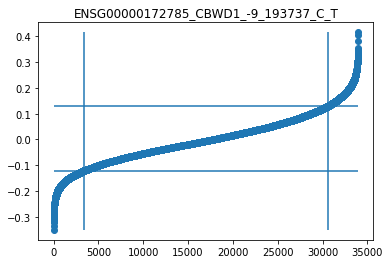

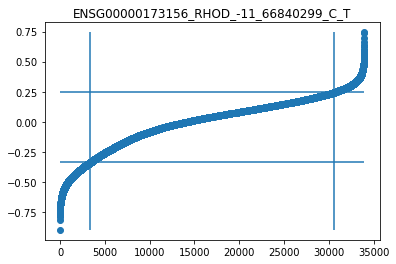

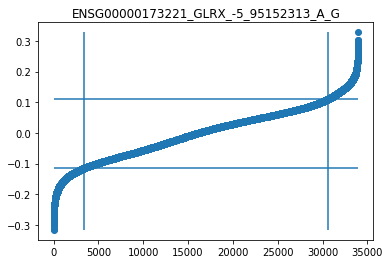

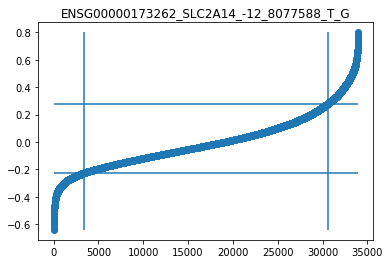

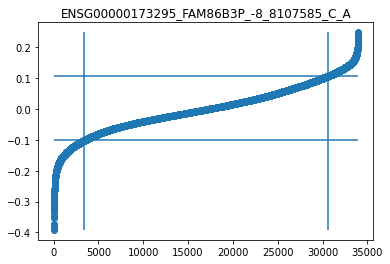

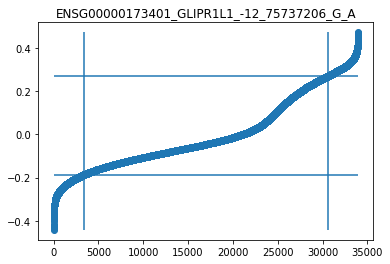

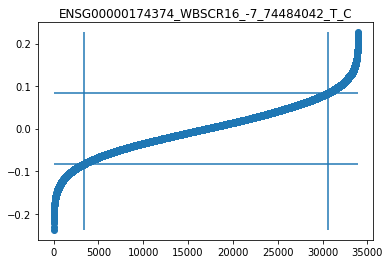

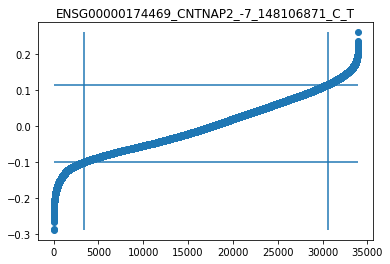

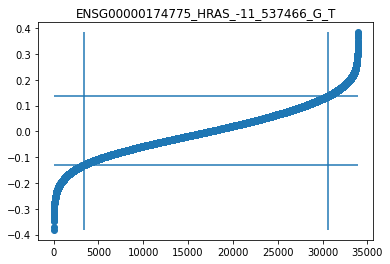

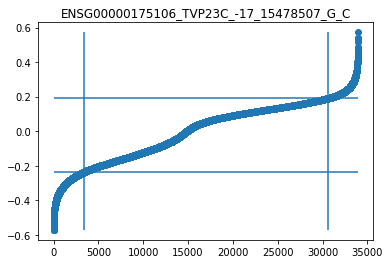

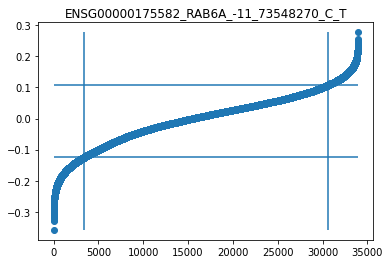

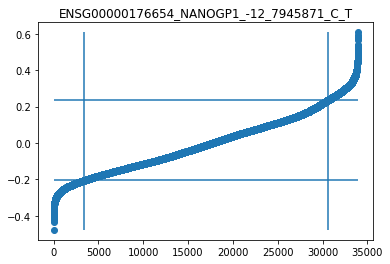

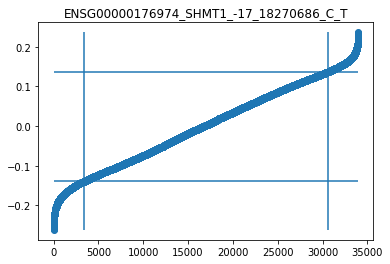

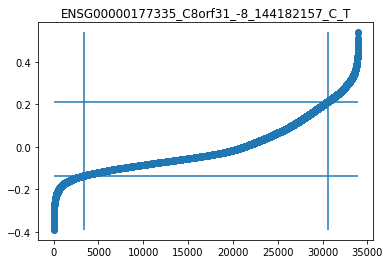

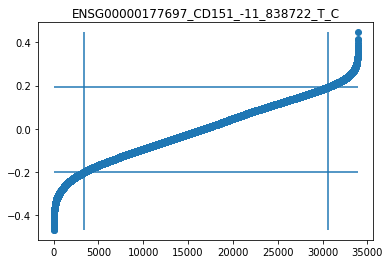

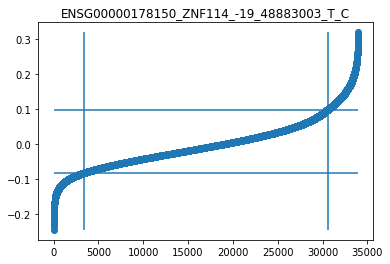

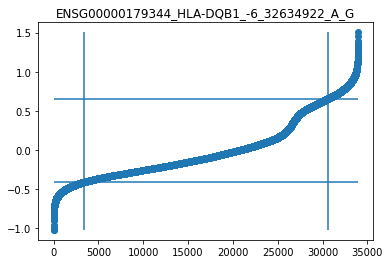

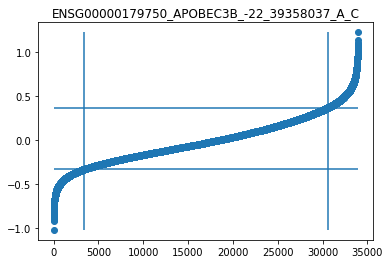

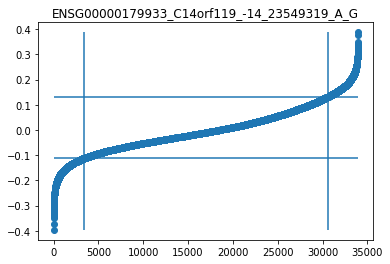

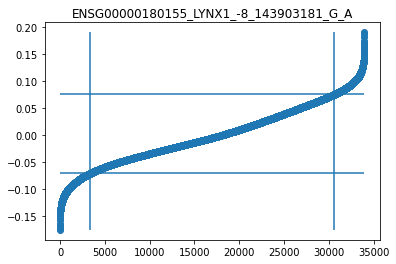

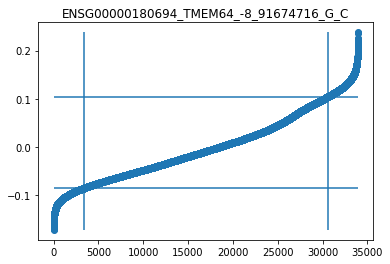

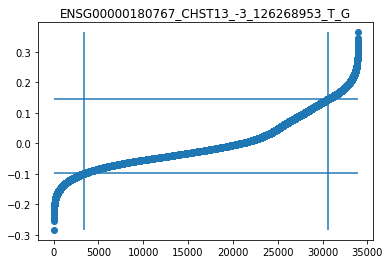

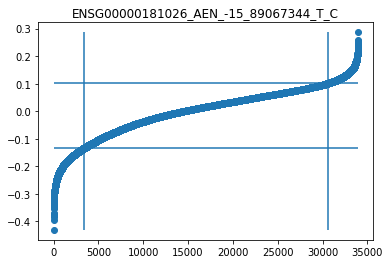

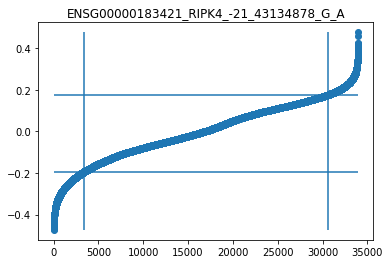

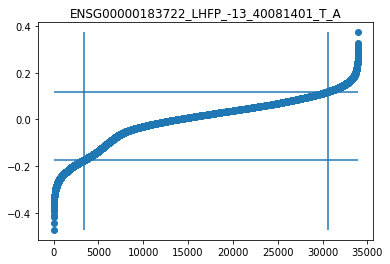

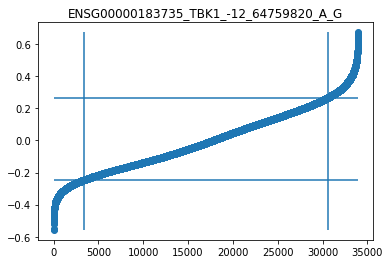

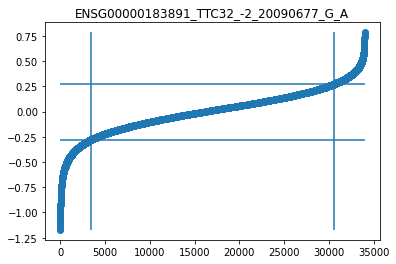

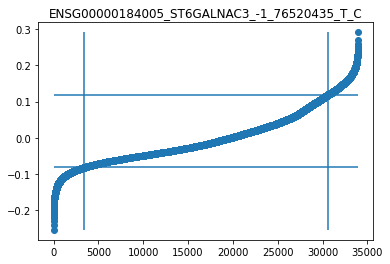

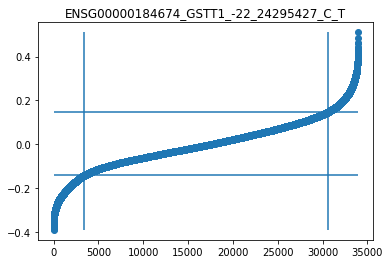

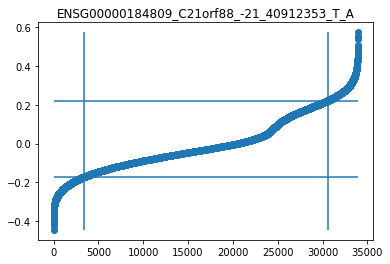

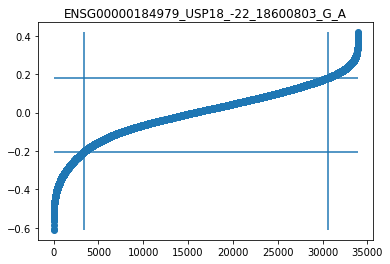

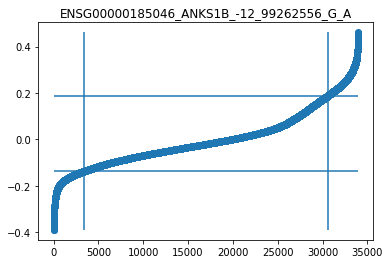

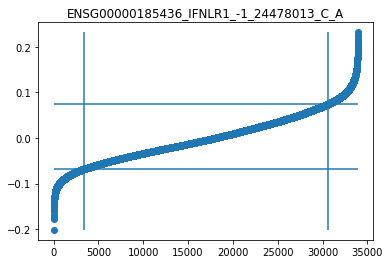

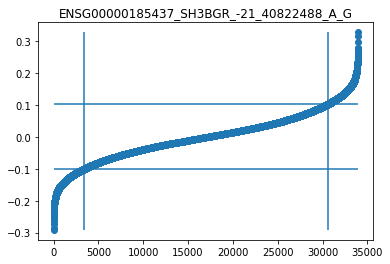

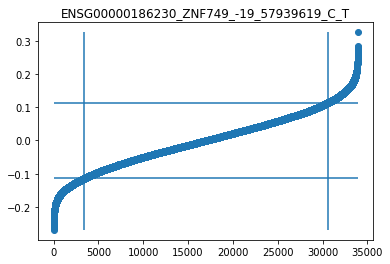

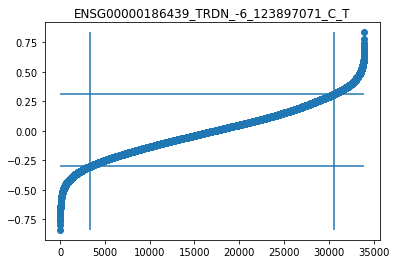

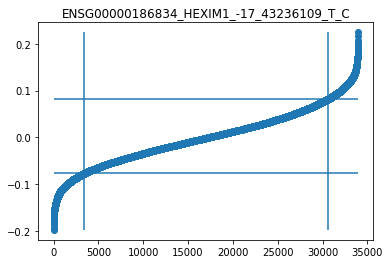

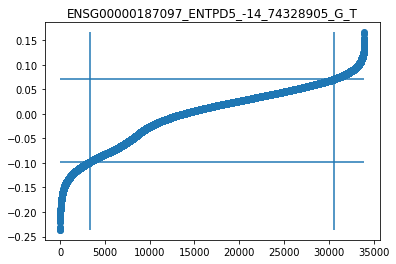

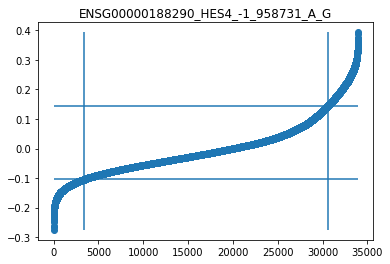

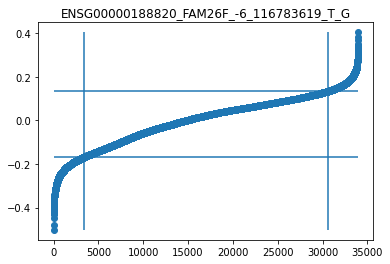

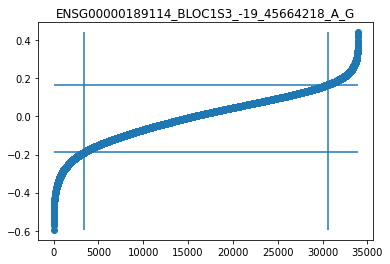

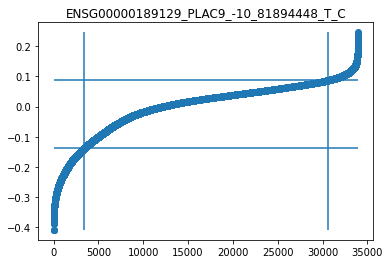

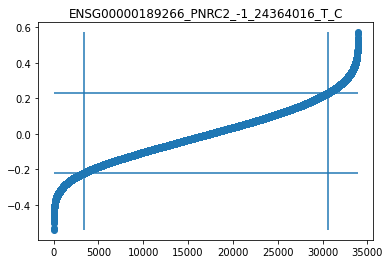

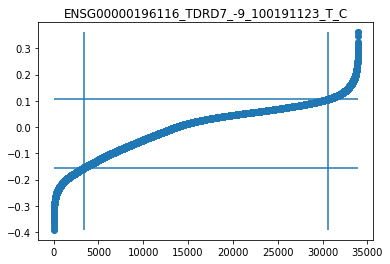

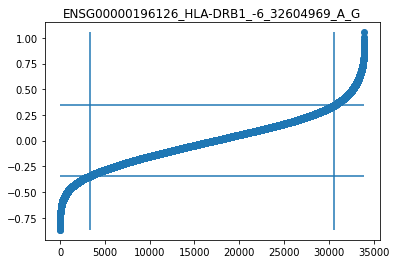

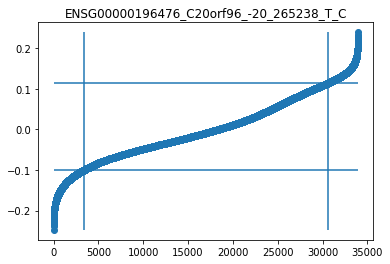

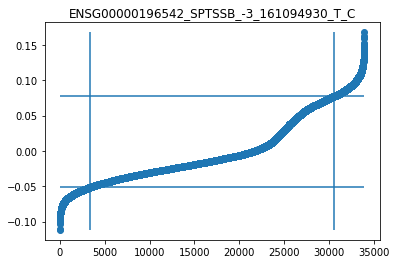

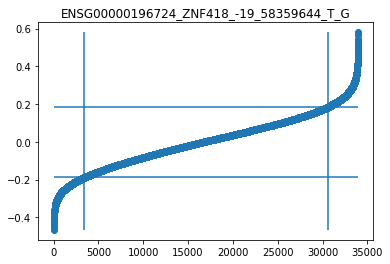

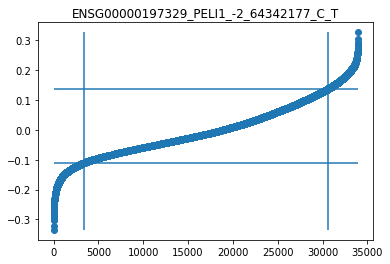

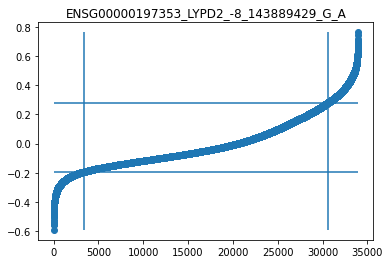

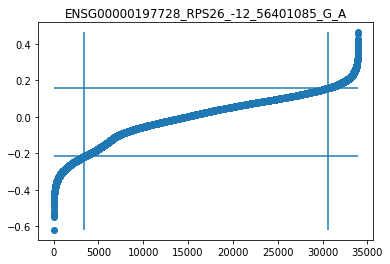

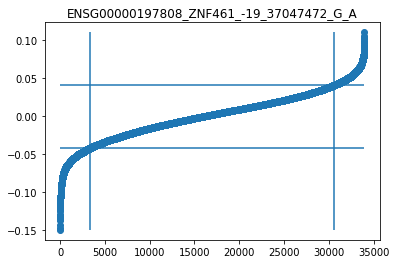

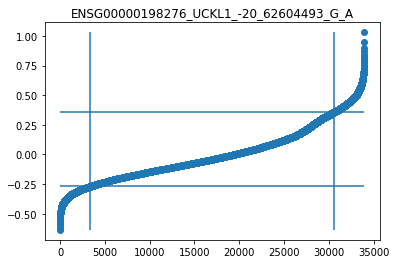

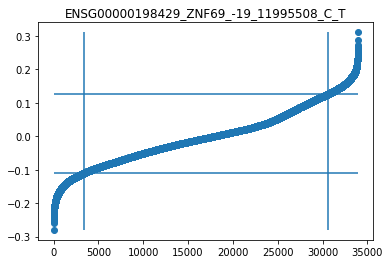

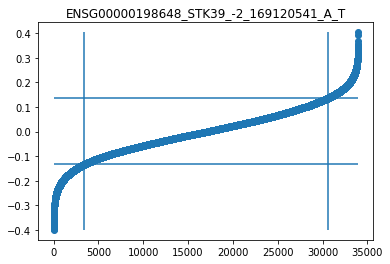

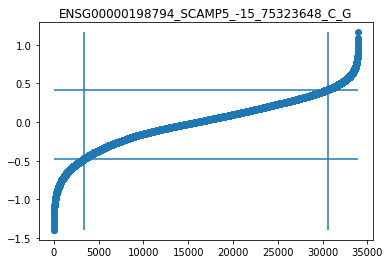

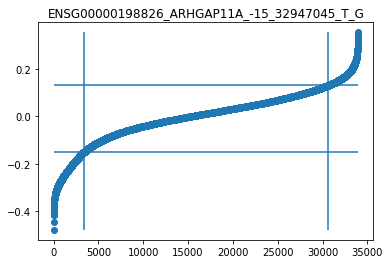

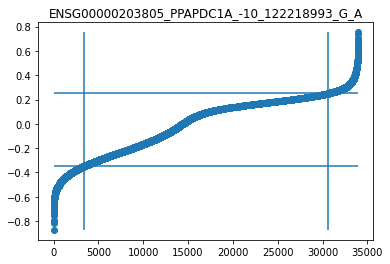

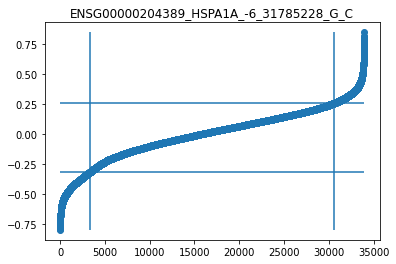

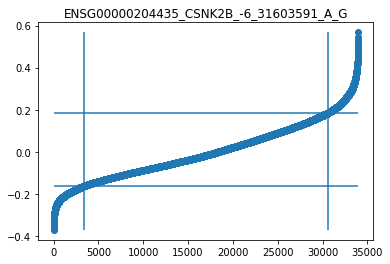

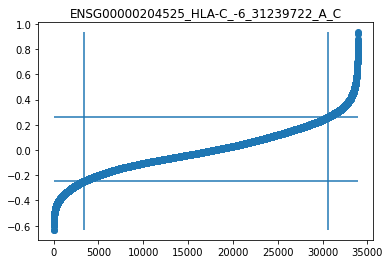

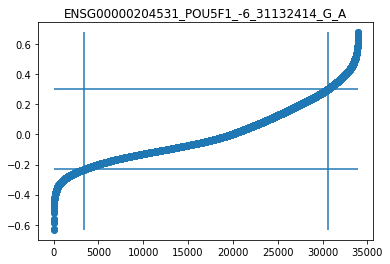

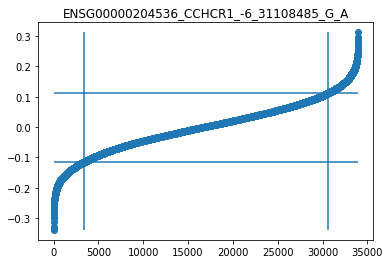

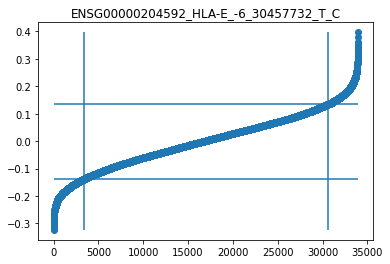

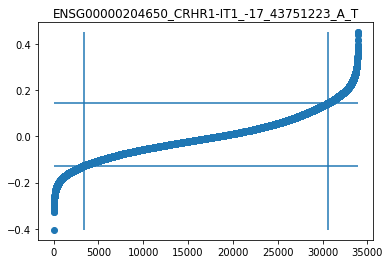

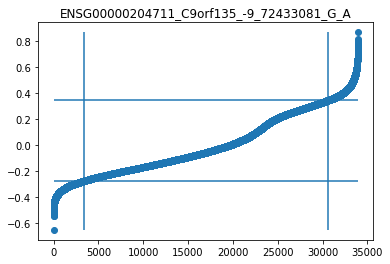

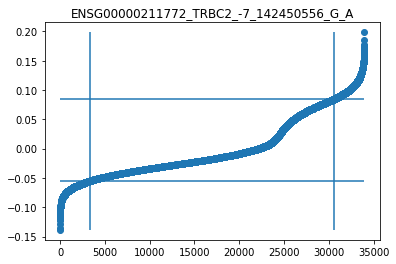

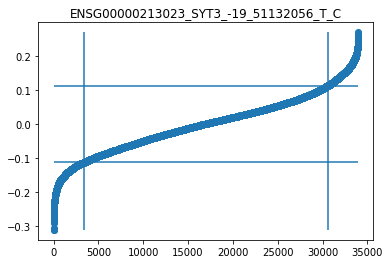

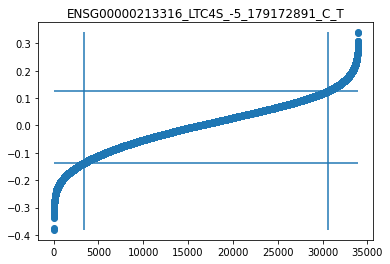

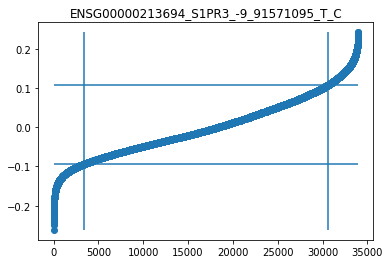

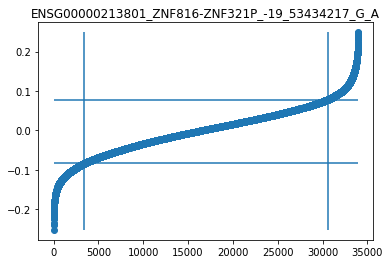

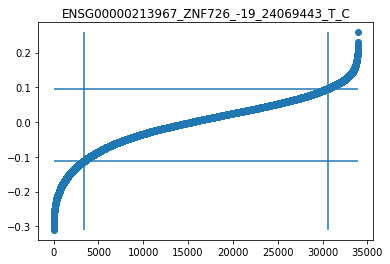

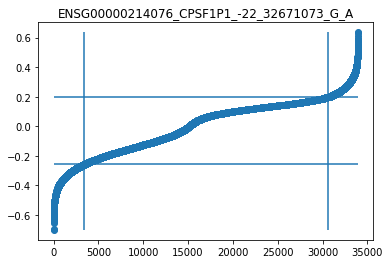

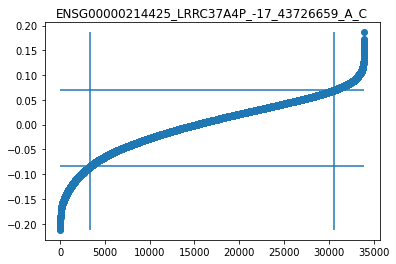

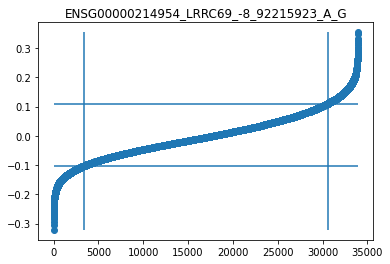

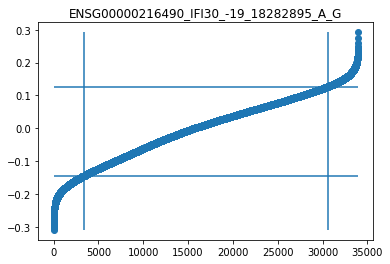

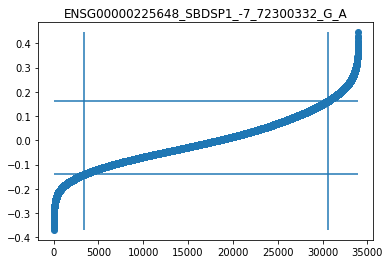

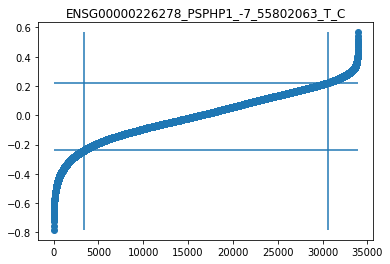

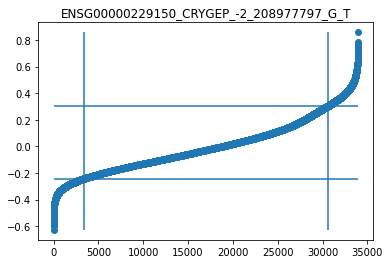

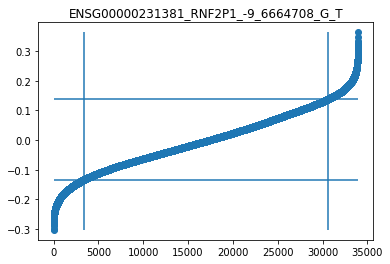

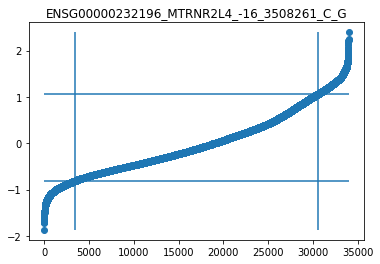

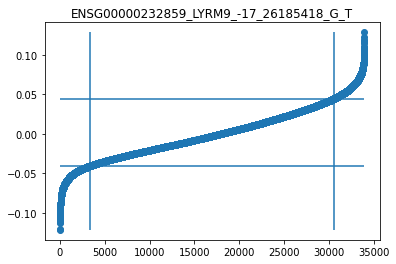

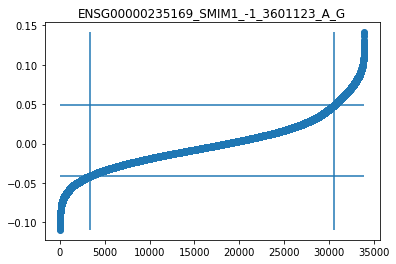

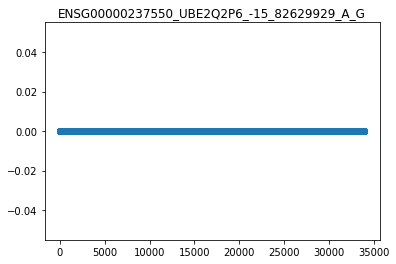

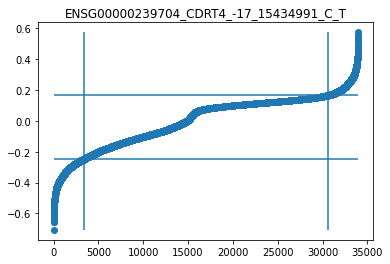

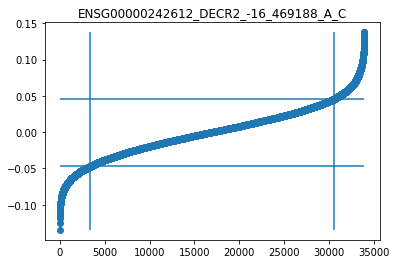

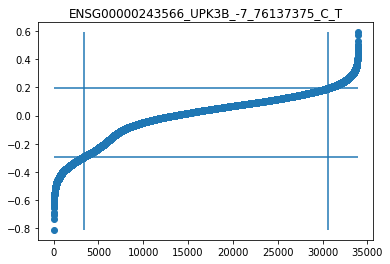

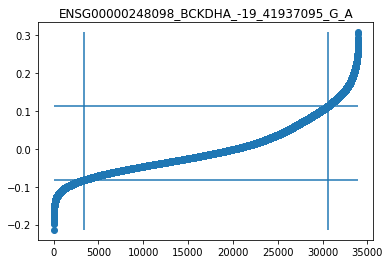

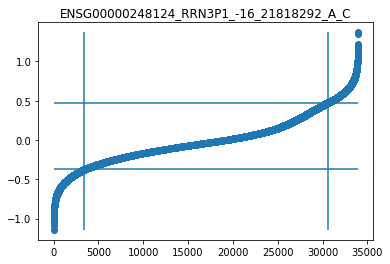

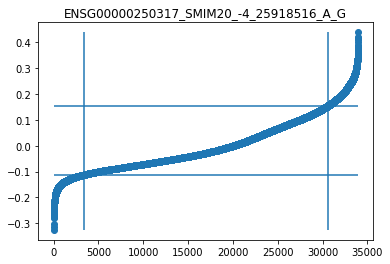

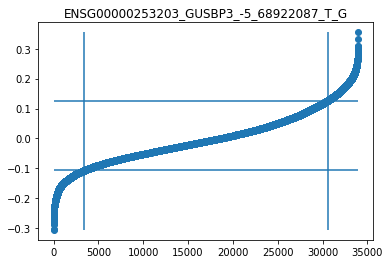

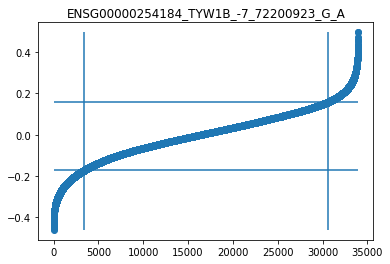

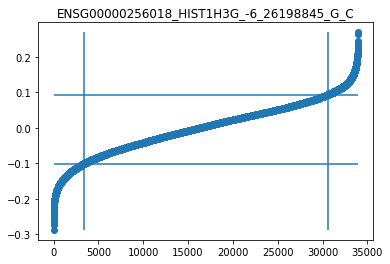

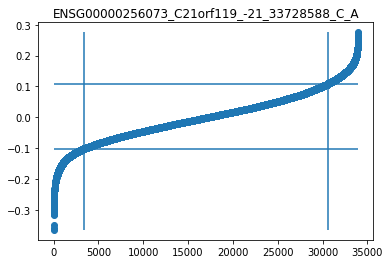

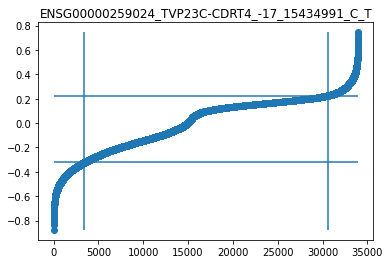

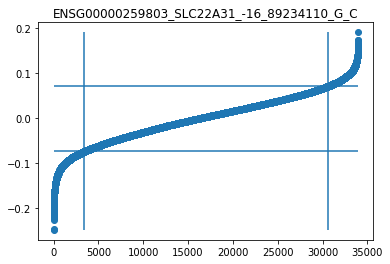

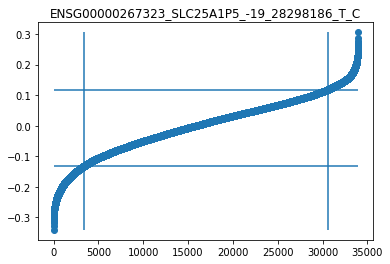

In [3]:
beta = np.array([])
for i in range(df.shape[1]):
# for i in range(5):
    # get single-cell effect sizes
    v = df.values[:,i]
    # get min and max
    ymin = min(v)
    ymax = max(v)
    # rank values
    order = v.argsort()
    y = v[order]
    x = range(len(v))
    plt.scatter(x,y)
    # define 10% of cells
    xx = ceil(0.1*len(v))
    plt.vlines(x=xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[xx],xmin=0, xmax=len(v))
    plt.vlines(x=len(v)-xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[len(v)-xx],xmin=0, xmax=len(v))
    # add title
    plt.title(df.columns.values[i])
    plt.show()
    beta = np.append(beta,y[len(v)-xx]-y[xx])

In [4]:
beta.shape
df.columns.values.shape

(322,)

In [5]:
d = np.concatenate([beta.reshape(beta.shape[0],1),df.columns.values.reshape(beta.shape[0],1)], axis=1)
df_beta = pd.DataFrame(data = d, columns = ["beta","eqtl"])
df_beta.head()

beta                                       eqtl
0  0.151162  ENSG00000005059_CCDC109B_-4_110648632_T_A
1  0.195709     ENSG00000006016_CRLF1_-19_18735221_G_T
2  0.142675     ENSG00000006459_KDM7A_-7_139913409_G_A
3  0.598697    ENSG00000013297_CLDN11_-3_170402765_T_C
4  0.367702   ENSG00000021300_PLEKHB1_-11_73339784_G_A

In [6]:
# df_beta.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_est_single_GxE_genetic_effects.csv")

In [7]:
max(beta)

3.23074901934807

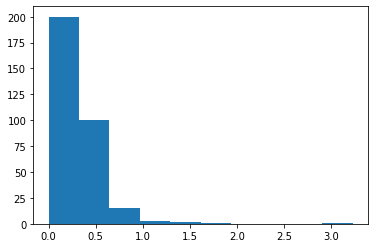

In [8]:
plt.hist(beta)
plt.show()

In [9]:
beta[beta.argsort()]

array([0.        , 0.08246628, 0.08506573, 0.08937465, 0.09269617,
       0.10591511, 0.1069625 , 0.11306047, 0.12009188, 0.12085807,
       0.12305566, 0.12335763, 0.1237011 , 0.12841774, 0.13249641,
       0.13560931, 0.13570766, 0.13691117, 0.13835433, 0.13875456,
       0.1387847 , 0.13971542, 0.13999332, 0.14193219, 0.14267454,
       0.14317374, 0.14490566, 0.14581218, 0.14712999, 0.14846184,
       0.15021247, 0.15116224, 0.15185313, 0.15319755, 0.15349792,
       0.15561409, 0.15581823, 0.15626453, 0.15856643, 0.15856701,
       0.15859634, 0.16061624, 0.16158197, 0.16186868, 0.16200089,
       0.16478902, 0.16533354, 0.16547669, 0.16575351, 0.16606755,
       0.1676371 , 0.168202  , 0.16839069, 0.16995221, 0.17201821,
       0.17205566, 0.17296535, 0.17489309, 0.17588549, 0.176367  ,
       0.17764174, 0.18001646, 0.18039829, 0.18297202, 0.18625119,
       0.18713735, 0.18759691, 0.18843713, 0.18925193, 0.1895181 ,
       0.19336165, 0.19369867, 0.19387804, 0.19434856, 0.19476

In [10]:
df_betas_sel = df_beta[df_beta["beta"]>1]
df_betas_sel

beta                                       eqtl
30   1.424827  ENSG00000100058_CRYBB2P1_-22_25845855_C_G
84   1.328731   ENSG00000124693_HIST1H3B_-6_26020936_C_T
88   1.142909       ENSG00000125885_MCM8_-20_5915922_A_C
117  3.230749       ENSG00000137331_IER3_-6_30639412_A_G
241  1.064494   ENSG00000179344_HLA-DQB1_-6_32634922_A_G
305  1.879036   ENSG00000232196_MTRNR2L4_-16_3508261_C_G

In [11]:
eqtls = np.array(df_beta["eqtl"])
# eqtls

In [12]:
df = df.loc[:,eqtls]
df.shape

(33964, 322)

In [13]:
### MOFA
pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_logcounts_model_factors.csv"
df_pcs = pd.read_csv(pcs_filename, index_col=0)
df_pcs.head()
# df_pcs.index

MOFA1     MOFA2     MOFA3     MOFA4     MOFA5     MOFA6  \
21843_1#10  -0.597704  1.067436  0.056496  1.347661  0.640743  0.337826   
21843_1#100  0.233285  2.137884  0.646811  1.129460 -0.352773 -0.091806   
21843_1#101 -0.054712  1.786031 -0.099625  0.364118  0.057125  0.215032   
21843_1#102 -0.730924  1.132253  0.195645  0.588264  1.548193  0.251288   
21843_1#103 -0.257399  1.515610 -0.154816  0.199532  0.719182 -0.296087   

                MOFA7     MOFA8     MOFA9    MOFA10    MOFA11    MOFA12  \
21843_1#10  -0.466419  0.015208  0.292243 -0.632737 -0.583318  0.473121   
21843_1#100  0.924137 -0.373492  1.789593 -0.659233  0.462286 -0.138813   
21843_1#101  0.242728  0.075943  0.879961  0.680635  0.372930  0.268620   
21843_1#102 -0.399754 -0.210800  0.115147  0.060057 -0.584682 -0.421879   
21843_1#103 -0.426952 -0.229939  0.091292 -0.430566 -0.473848 -1.243472   

               MOFA13    MOFA14    MOFA15    MOFA16    MOFA17    MOFA18  \
21843_1#10   0.454845 -0.991047  0.906530 -0.786617  0.445996 -1.810175   
21843_1#100 -2.220937  1.554073 -1.517363 -0.350251 -0.165591  1.199816   
21843_1#101 -2.024130  1.150452 -0.054901 -0.459422  0.421497  1.172856   
21843_1#102 -0.127777  0.157820  0.735246 -1.818381 -0.148435 -0.168095   
21843_1#103 -0.852861 -0.064272  0.321025 -0.666393  0.455624 -0.410516   

               MOFA19    MOFA20  
21843_1#10  -1.039795  0.268045  
21843_1#100  0.729859  0.048444  
21843_1#101  0.729108 -0.124239  
21843_1#102 -0.770380  1.124324  
21843_1#103 -0.600952  0.304595

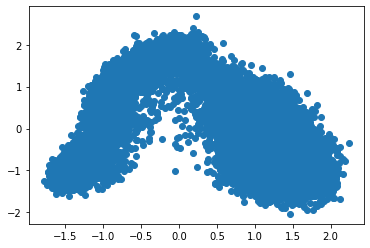

In [14]:
plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1])
plt.show()

In [15]:
## consider only shared cells

In [16]:
all_cells = df_pcs.index.values

In [17]:
## sample 20% of cells

In [18]:
cells = sample(list(all_cells), k = ceil(len(all_cells)*0.2))
cells = sorted(set(list(df.index.values)).intersection(cells))

In [19]:
df = df[df.index.isin(cells)]
df.shape

(6809, 322)

In [20]:
df_pcs = df_pcs[df_pcs.index.isin(cells)]
df_pcs.shape

(6809, 20)

In [21]:
# sort to ensure cells are in the same order
df = df.sort_index(axis=0)
df_pcs = df_pcs.sort_index(axis=0)

In [22]:
## take absolute values
df_abs = df.abs()

In [23]:
# scale values
mat = minmax_scale(df_abs)
df = pd.DataFrame(data = mat, index = df.index, columns = df.columns)

In [24]:
df.head()

ENSG00000005059_CCDC109B_-4_110648632_T_A  \
21241_6#101                                   0.389943   
21241_6#104                                   0.162624   
21241_6#105                                   0.014051   
21241_6#111                                   0.023250   
21241_6#112                                   0.307212   

             ENSG00000006016_CRLF1_-19_18735221_G_T  \
21241_6#101                                0.260848   
21241_6#104                                0.026556   
21241_6#105                                0.200066   
21241_6#111                                0.132571   
21241_6#112                                0.654794   

             ENSG00000006459_KDM7A_-7_139913409_G_A  \
21241_6#101                                0.568289   
21241_6#104                                0.194697   
21241_6#105                                0.096588   
21241_6#111                                0.003376   
21241_6#112                                0.431824   

             ENSG00000013297_CLDN11_-3_170402765_T_C  \
21241_6#101                                 0.079868   
21241_6#104                                 0.608503   
21241_6#105                                 0.156281   
21241_6#111                                 0.273693   
21241_6#112                                 0.297870   

             ENSG00000021300_PLEKHB1_-11_73339784_G_A  \
21241_6#101                                  0.183546   
21241_6#104                                  0.531233   
21241_6#105                                  0.234180   
21241_6#111                                  0.253955   
21241_6#112                                  0.082389   

             ENSG00000029639_TFB1M_-6_155635808_C_G  \
21241_6#101                                0.196287   
21241_6#104                                0.269975   
21241_6#105                                0.043649   
21241_6#111                                0.259001   
21241_6#112                                0.055297   

             ENSG00000033178_UBA6_-4_68480525_C_T  \
21241_6#101                              0.004574   
21241_6#104                              0.355055   
21241_6#105                              0.289416   
21241_6#111                              0.344186   
21241_6#112                              0.100652   

             ENSG00000035115_SH3YL1_-2_256116_G_T  \
21241_6#101                              0.109128   
21241_6#104                              0.521846   
21241_6#105                              0.032440   
21241_6#111                              0.133703   
21241_6#112                              0.289472   

             ENSG00000059377_TBXAS1_-7_139547370_G_A  \
21241_6#101                                 0.400195   
21241_6#104                                 0.369804   
21241_6#105                                 0.019205   
21241_6#111                                 0.034267   
21241_6#112                                 0.652616   

             ENSG00000063761_ADCK1_-14_78311319_G_A  ...  \
21241_6#101                                0.018456  ...   
21241_6#104                                0.209790  ...   
21241_6#105                                0.039512  ...   
21241_6#111                                0.109849  ...   
21241_6#112                                0.211034  ...   

             ENSG00000248098_BCKDHA_-19_41937095_G_A  \
21241_6#101                                 0.063757   
21241_6#104                                 0.145545   
21241_6#105                                 0.240602   
21241_6#111                                 0.037867   
21241_6#112                                 0.086680   

             ENSG00000248124_RRN3P1_-16_21818292_A_C  \
21241_6#101                                 0.574817   
21241_6#104                                 0.539622   
21241_6#105                                 0.309033   
21241_6#111                                 0.401616   
21241_6#112                           

In [25]:
### save scaled data

In [26]:
# delect columns that are only 0s
df = df.loc[:, (df != 0).any(axis=0)]

In [27]:
### build "fake" AnnData file
#
# counts: single-cell eQTL effects
# adata.obsm['spatial']: coordinates (PCA, UMAP..)

In [28]:
# obs i.e. cells
obs_names = df.index.values
obs = pd.DataFrame(index=obs_names)
# obs
n_obs = len(obs)
n_obs

6809

In [29]:
# vars i.e. genes (or in this case gene-SNP pairs)
var_names = df.columns.values
var = pd.DataFrame(index=var_names)
# var
n_vars = len(var)
n_vars

321

In [30]:
X = df.to_numpy()
X.shape
type(X)

numpy.ndarray

In [31]:
adata = ad.AnnData(X=X, obs=obs, var=var, dtype='float')
adata

AnnData object with n_obs × n_vars = 6809 × 321

In [32]:
## add PCs as "spatial" coordinates
adata.obsm['spatial'] = df_pcs
adata.obsm['spatial'].shape

(6809, 20)

In [33]:
adata

AnnData object with n_obs × n_vars = 6809 × 321
    obsm: 'spatial'

In [34]:
sp = spatial_patterns(adata, normalized = True, params=SpatialPatternParameters(lengthscales=5))

In [35]:
d = np.concatenate([sp[0].labels.reshape(len(sp[0].labels),1),
                    adata.var.index.to_numpy().reshape(len(sp[0].labels),1)], axis=1)
df_labels = pd.DataFrame(data = d, columns = ["label","gene"])
df_labels.head()

label                                       gene
0    16  ENSG00000005059_CCDC109B_-4_110648632_T_A
1    16     ENSG00000006016_CRLF1_-19_18735221_G_T
2    13     ENSG00000006459_KDM7A_-7_139913409_G_A
3     9    ENSG00000013297_CLDN11_-3_170402765_T_C
4     7   ENSG00000021300_PLEKHB1_-11_73339784_G_A

In [36]:
df_pp = pd.DataFrame(data = sp[0].pattern_probabilities, columns = ["pp"+str(i) for i in np.arange(len(np.unique(sp[0].labels)))])
df_pp.head()

pp0  pp1  pp2  pp3  pp4  pp5  pp6  pp7  pp8  pp9  pp10  pp11  pp12  pp13  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0   0.0   0.0   

   pp14  pp15  pp16  
0   0.0   0.0   1.0  
1   0.0   0.0   1.0  
2   0.0   0.0   0.0  
3   0.0   0.0   0.0  
4   0.0   0.0   0.0

In [37]:
df_cluster_summaries = pd.DataFrame(data = sp[0].patterns, index=df_pcs.index)
df_cluster_summaries.head()
# df_cluster_summaries.shape

0         1         2         3         4         5   \
21241_6#101  0.250748  0.420559 -0.501465  0.292845 -0.124107  1.116267   
21241_6#104 -0.128814  1.054675  0.139884  0.748875  0.367893  0.853124   
21241_6#105 -0.196151  0.667125 -0.157984 -0.025738 -0.168445  1.477293   
21241_6#111  0.108476  0.965181 -0.577042  0.114062 -0.405565  0.800957   
21241_6#112 -0.473218 -0.109380 -0.577868  0.725300  0.405710  0.312169   

                   6         7         8         9         10        11  \
21241_6#101  0.686837 -0.404508 -0.086049  0.384052  1.203842  0.494553   
21241_6#104  0.983805  1.277562 -0.327725  1.092781  0.007359 -0.054490   
21241_6#105  1.066863  0.750334 -0.194367  0.317621 -0.063524  0.118705   
21241_6#111  1.114075  0.277604 -0.052507  0.011733  0.183678 -0.053472   
21241_6#112  0.492802 -0.128488 -0.249226  0.755097  0.557222  0.293681   

                   12        13        14        15        16  
21241_6#101  1.193488  0.860927  0.352278  0.401066  0.373838  
21241_6#104 -0.032841 -0.096417  0.618134  0.236594  0.323978  
21241_6#105 -0.282874 -0.074084  0.356381  0.078084  0.560008  
21241_6#111 -0.277957  0.167523  0.893328 -0.051520  0.383481  
21241_6#112  1.697675  0.479336  0.317094  0.126577  0.451385

In [44]:
df_cluster_summaries.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_20pct_cluster_summaries.csv")

In [39]:
df_clusters = pd.concat([df_labels, df_pp], axis = 1)
df_clusters.head()

label                                       gene  pp0  pp1  pp2  pp3  pp4  \
0    16  ENSG00000005059_CCDC109B_-4_110648632_T_A  0.0  0.0  0.0  0.0  0.0   
1    16     ENSG00000006016_CRLF1_-19_18735221_G_T  0.0  0.0  0.0  0.0  0.0   
2    13     ENSG00000006459_KDM7A_-7_139913409_G_A  0.0  0.0  0.0  0.0  0.0   
3     9    ENSG00000013297_CLDN11_-3_170402765_T_C  0.0  0.0  0.0  0.0  0.0   
4     7   ENSG00000021300_PLEKHB1_-11_73339784_G_A  0.0  0.0  0.0  0.0  0.0   

   pp5  pp6  pp7  pp8  pp9  pp10  pp11  pp12  pp13  pp14  pp15  pp16  
0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  
1  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  
2  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
3  0.0  0.0  0.0  0.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4  0.0  0.0  1.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [40]:
df_clusters.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_20pct_cluster_labels.csv")

In [41]:
# df_clusters[df_clusters["gene"]=="ENSG00000137331_IER3-6_30639412_A_G"]

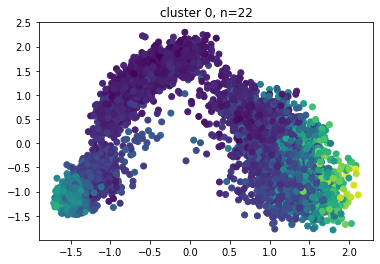

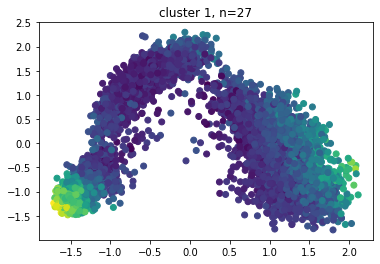

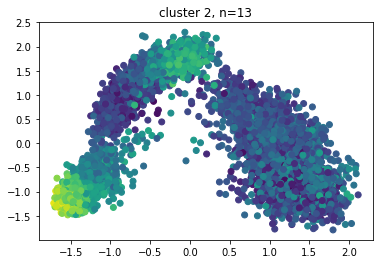

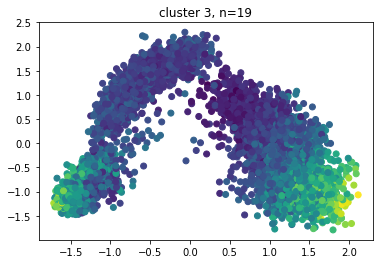

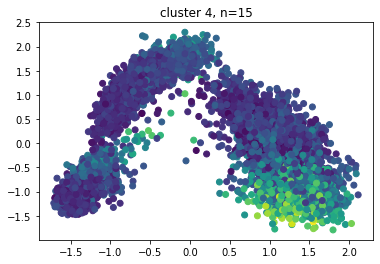

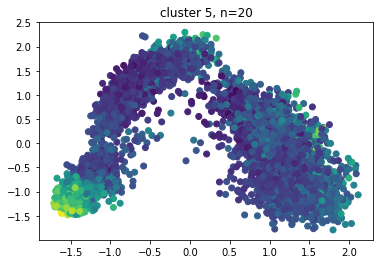

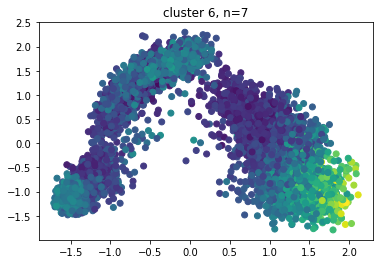

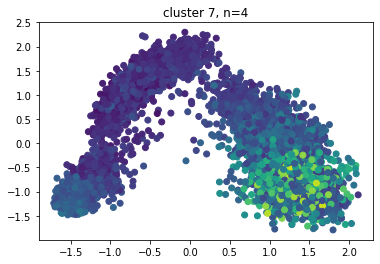

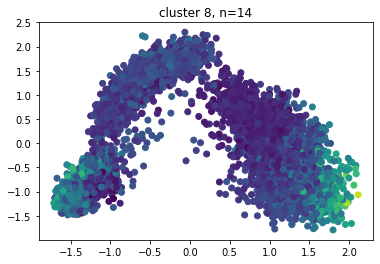

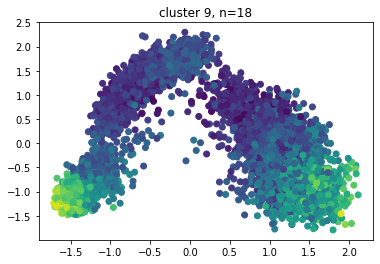

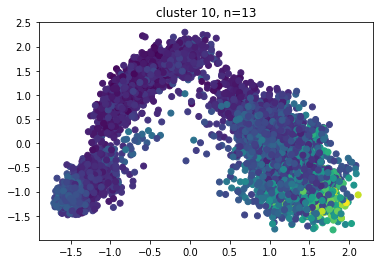

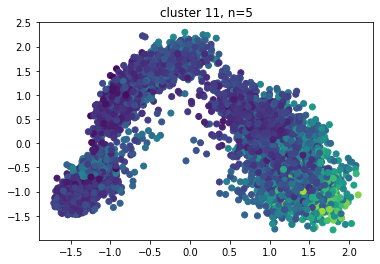

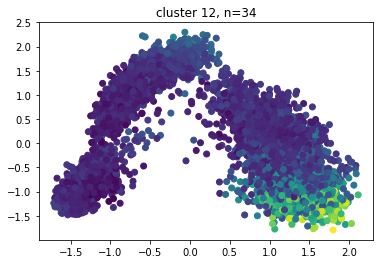

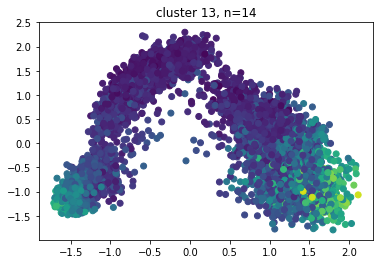

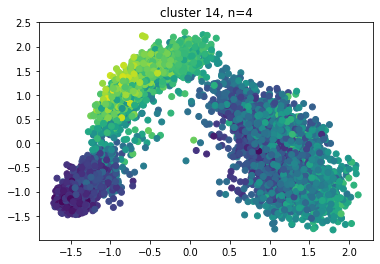

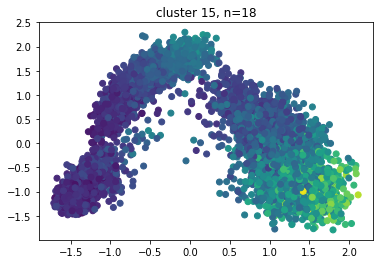

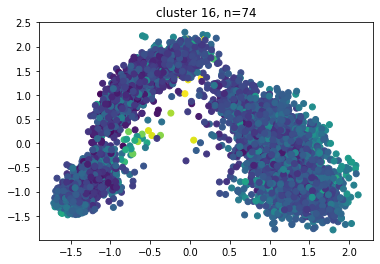

In [42]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i)+", n="+str(df_clusters[df_clusters["label"] == i].shape[0]))
    plt.show()

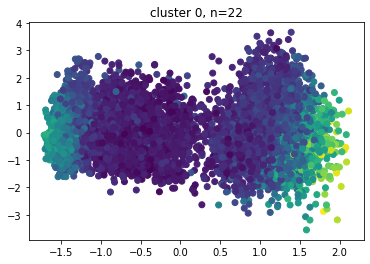

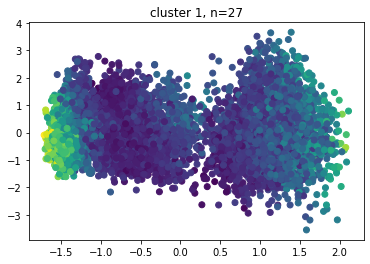

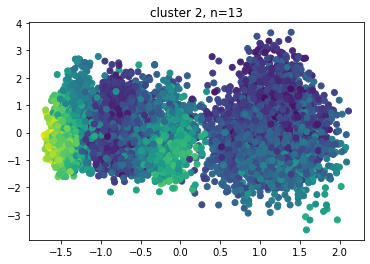

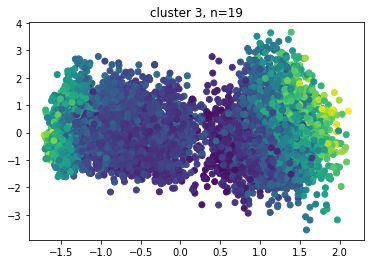

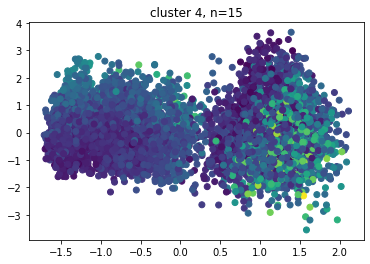

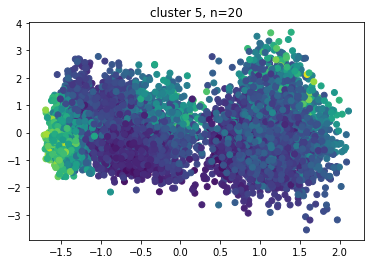

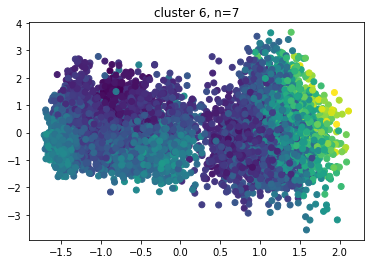

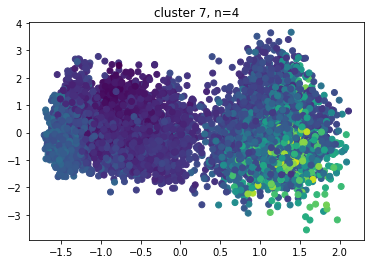

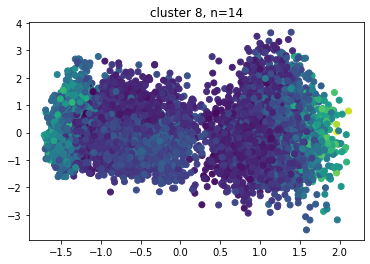

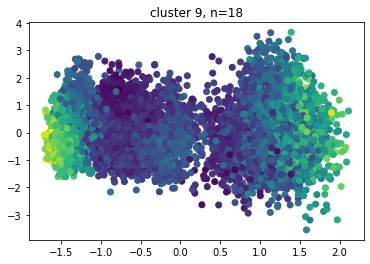

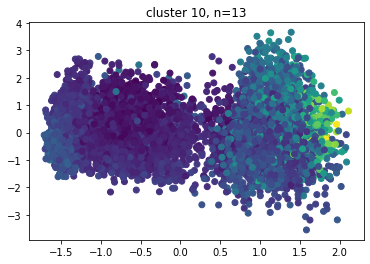

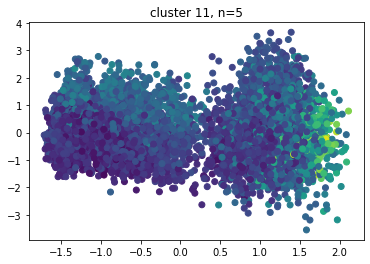

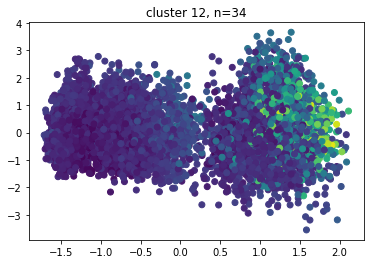

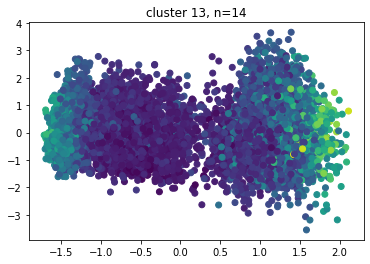

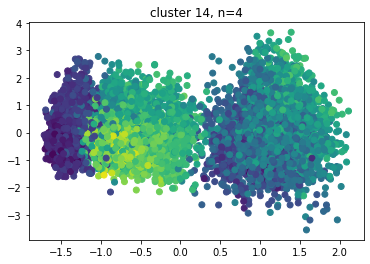

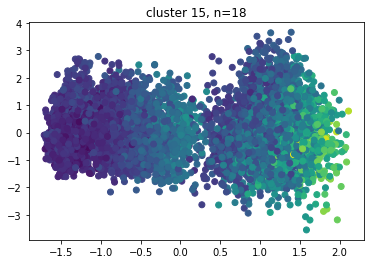

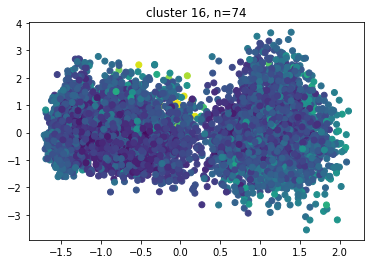

In [43]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_pcs.values[:,0],df_pcs.values[:,6], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i)+", n="+str(df_clusters[df_clusters["label"] == i].shape[0]))
    plt.show()